In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 9.0 MB/s eta 0:00:00


In [3]:
from IPython import display
display.clear_output()



In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:

!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00


In [7]:


from roboflow import Roboflow
rf = Roboflow(api_key="7mzMEU1itMQlPMRQAxNW")
project = rf.workspace("personfalldetection").project("person-fall")
dataset = project.version(3).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.18, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Person-Fall-3 in yolov8:: 100%|██████████| 17131/17131 [00:04<00:00, 4055.58it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Person-Fall-3/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Person-Fall-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

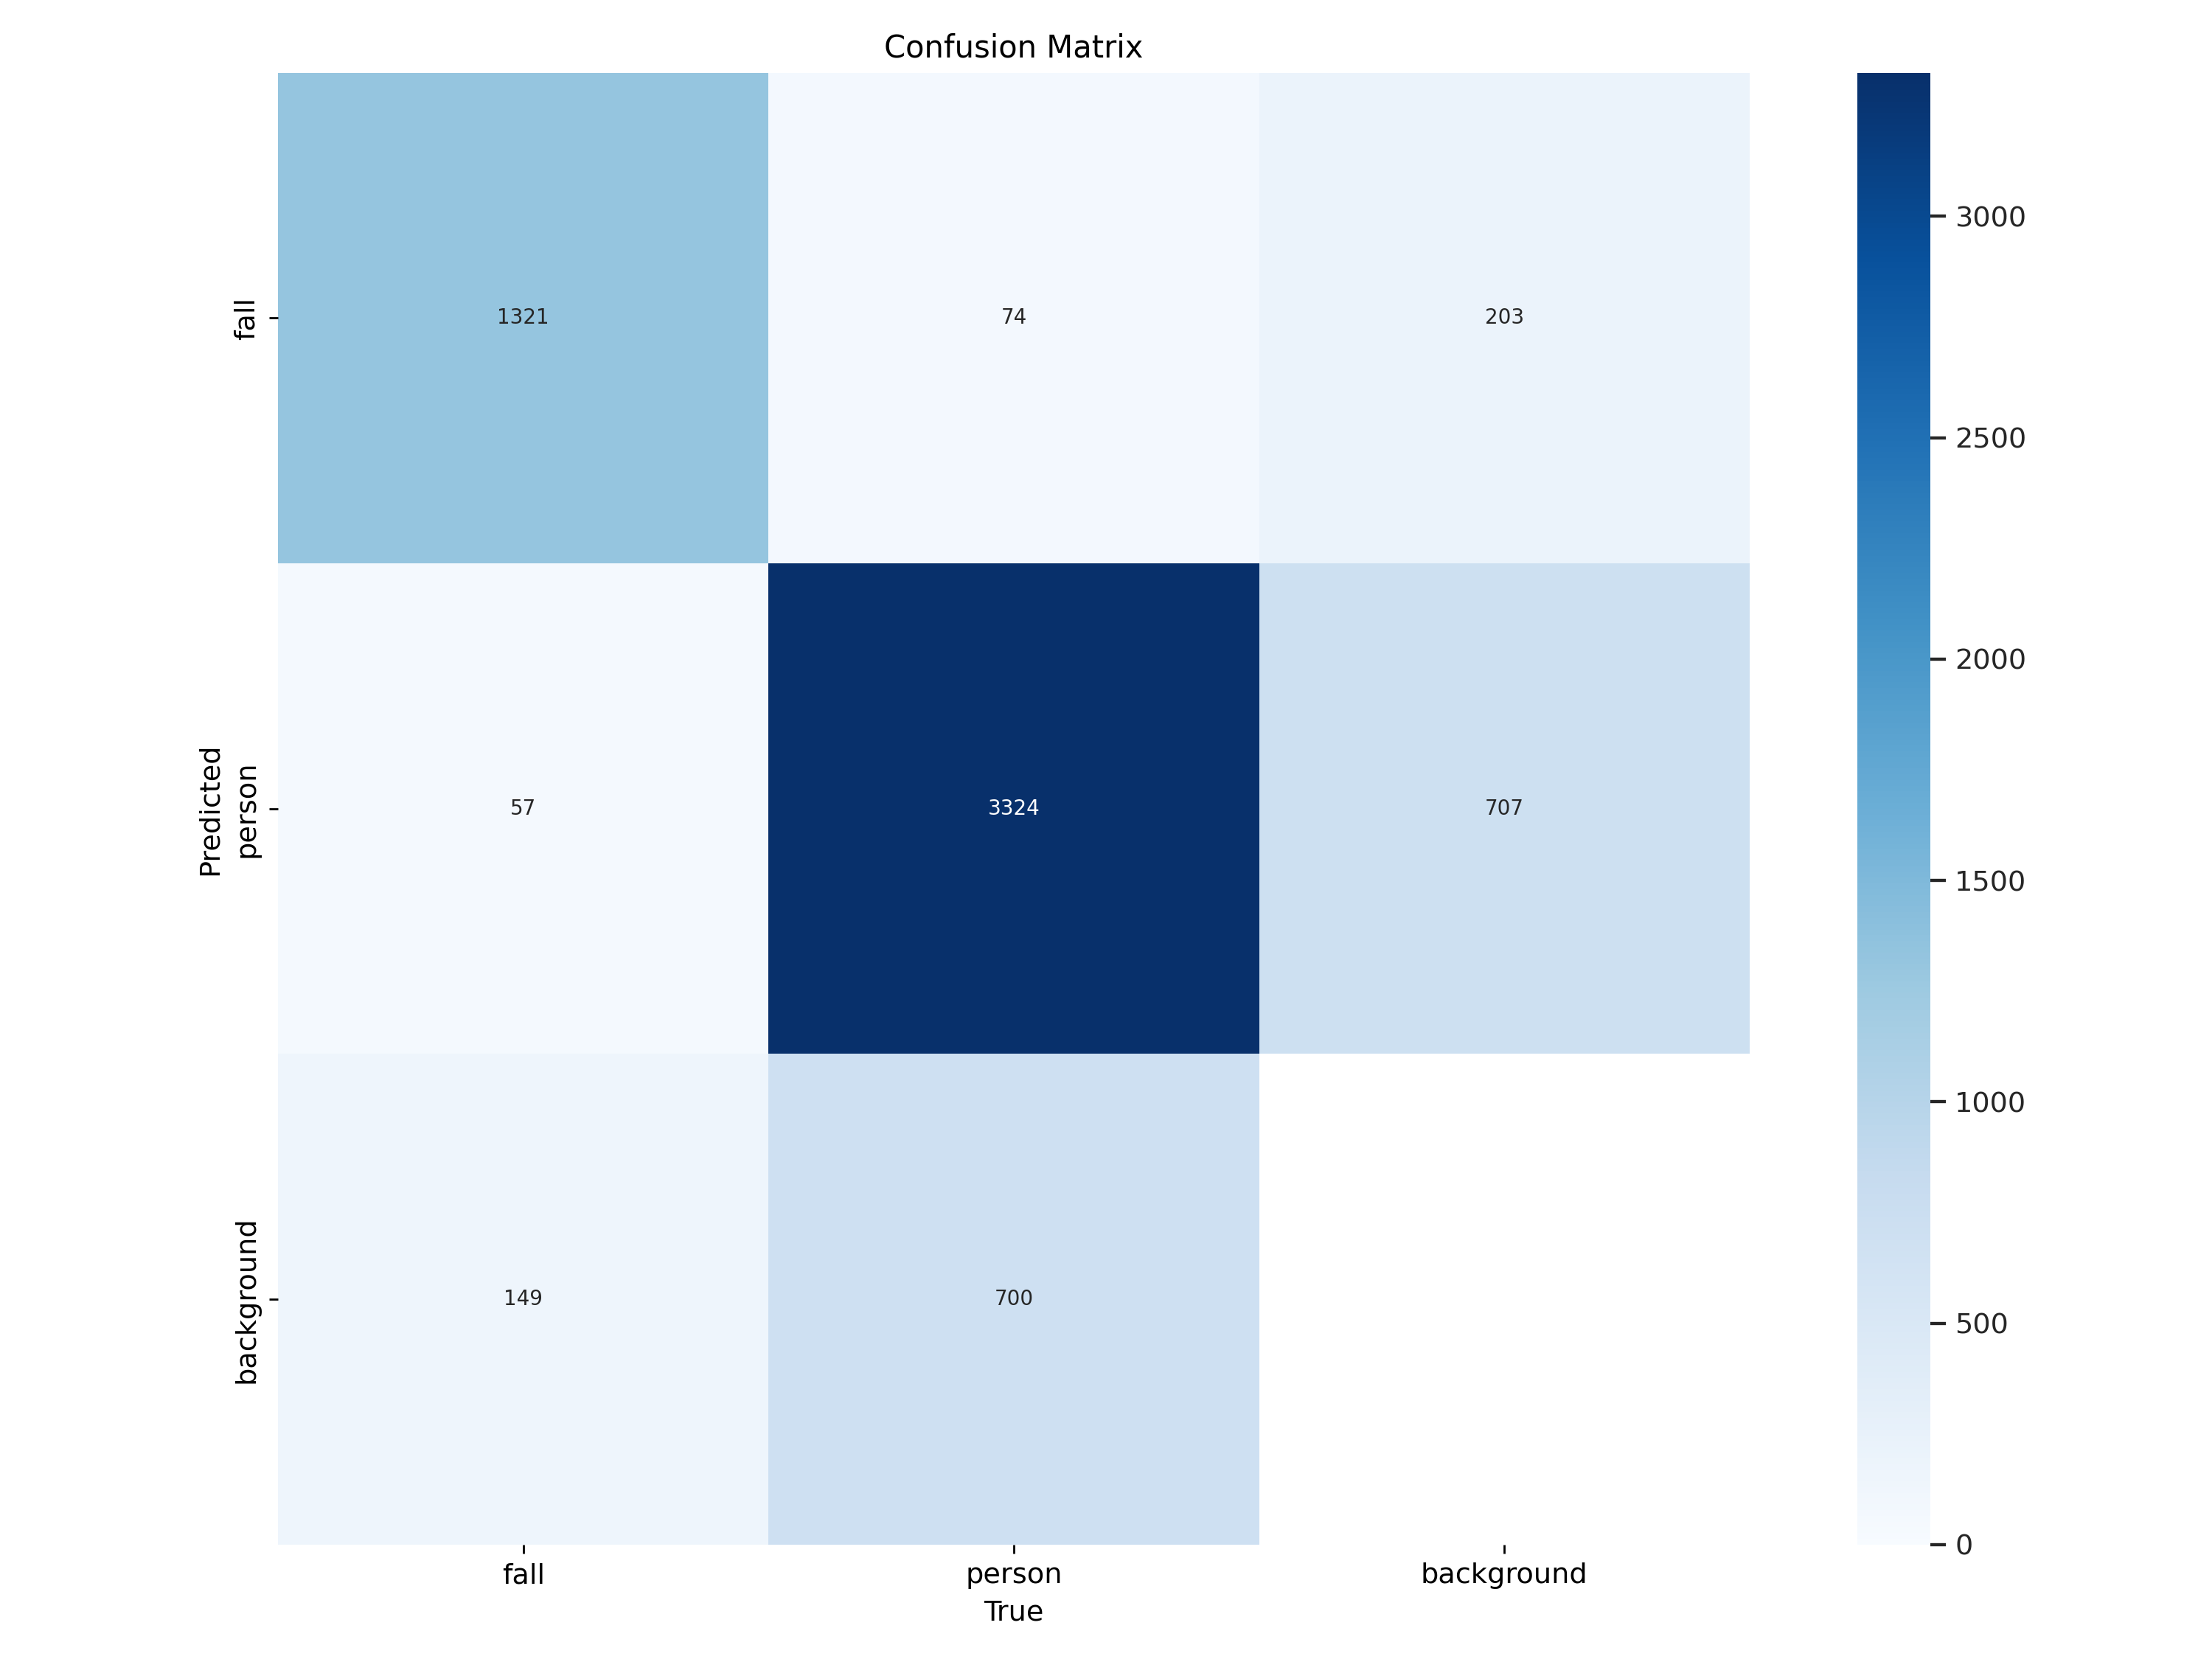

In [12]:

Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

In [11]:
from IPython.display import display, Image

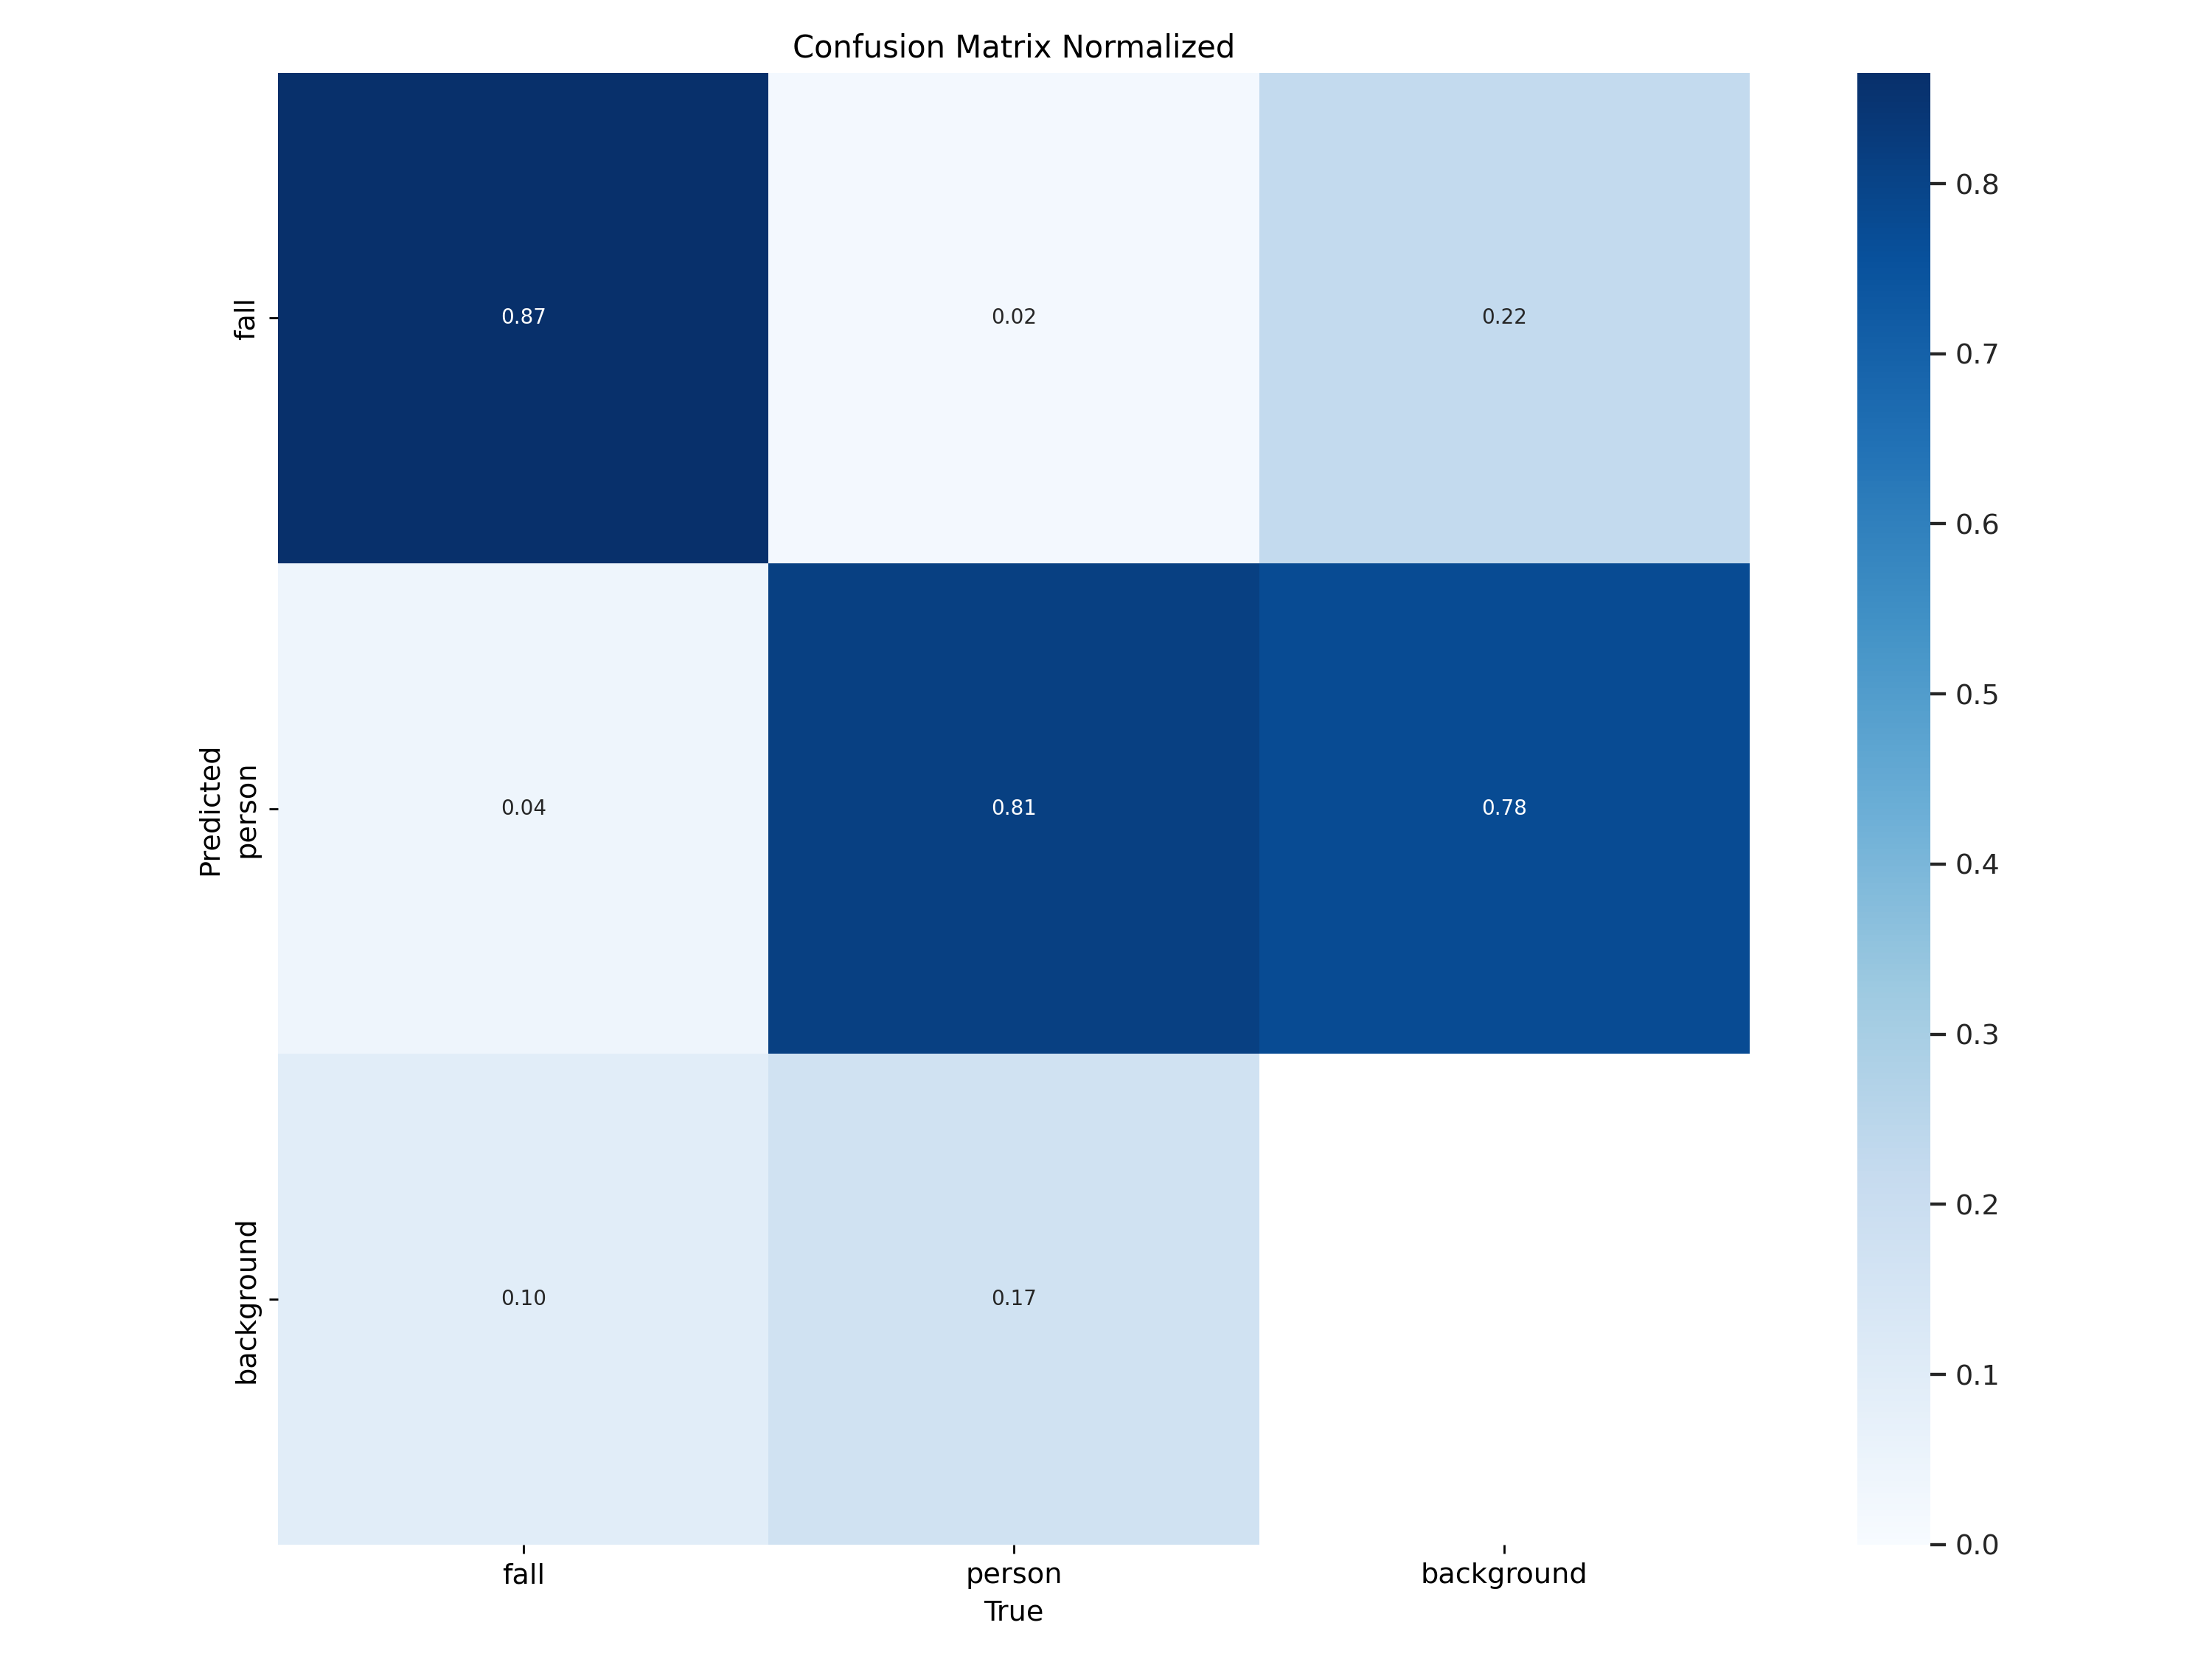

In [13]:

Image(filename=f'/content/runs/detect/train2/confusion_matrix_normalized.png', width=600)

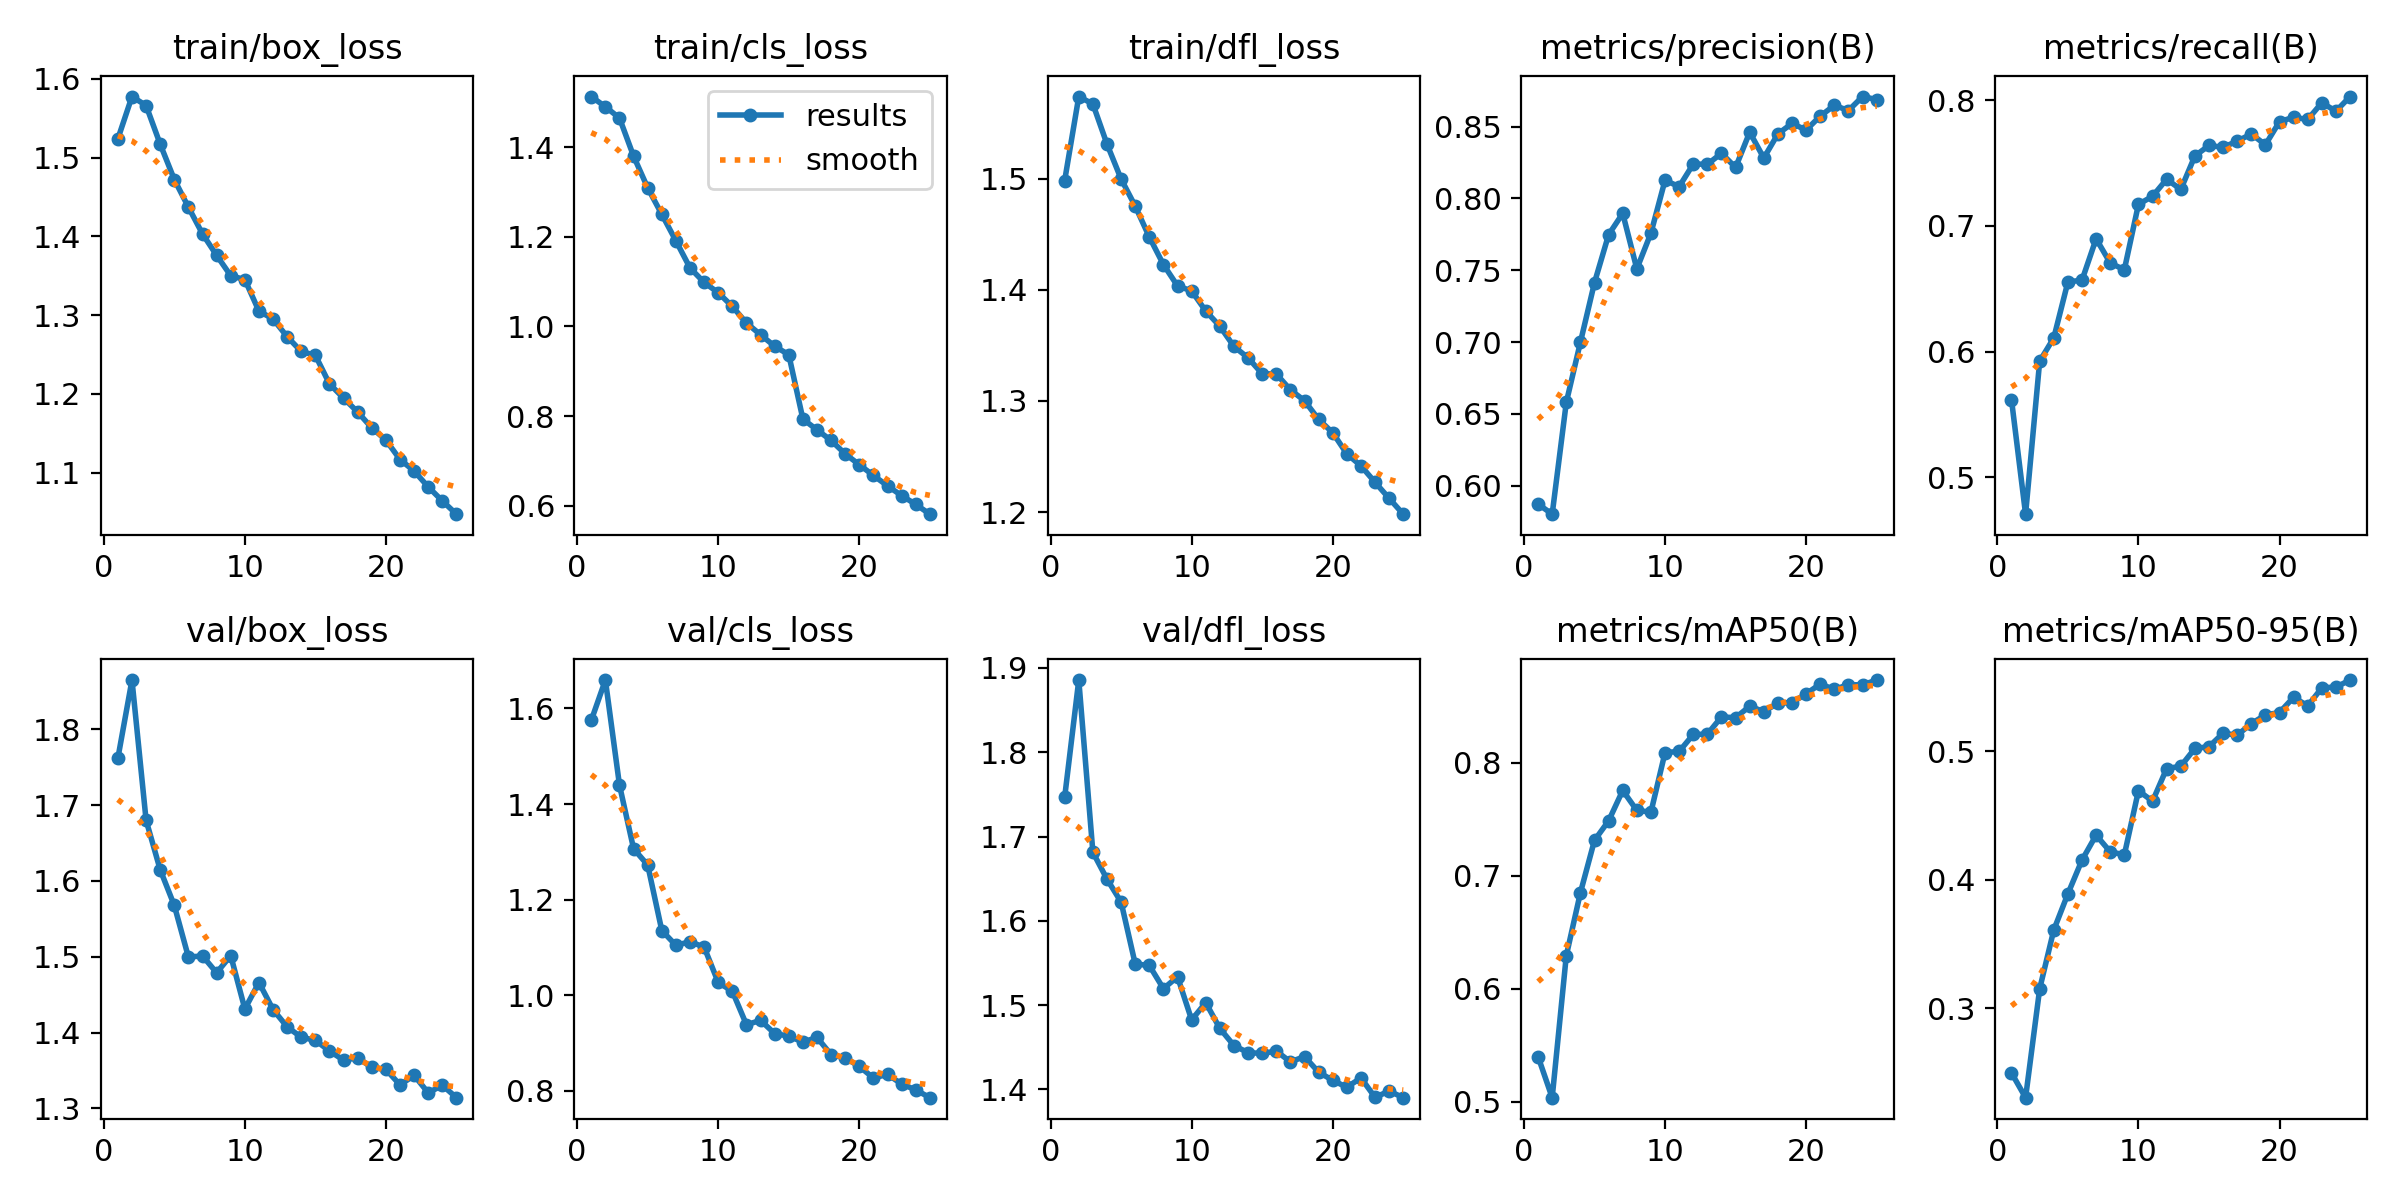

In [14]:

Image(filename=f'/content/runs/detect/train2/results.png', width=600)

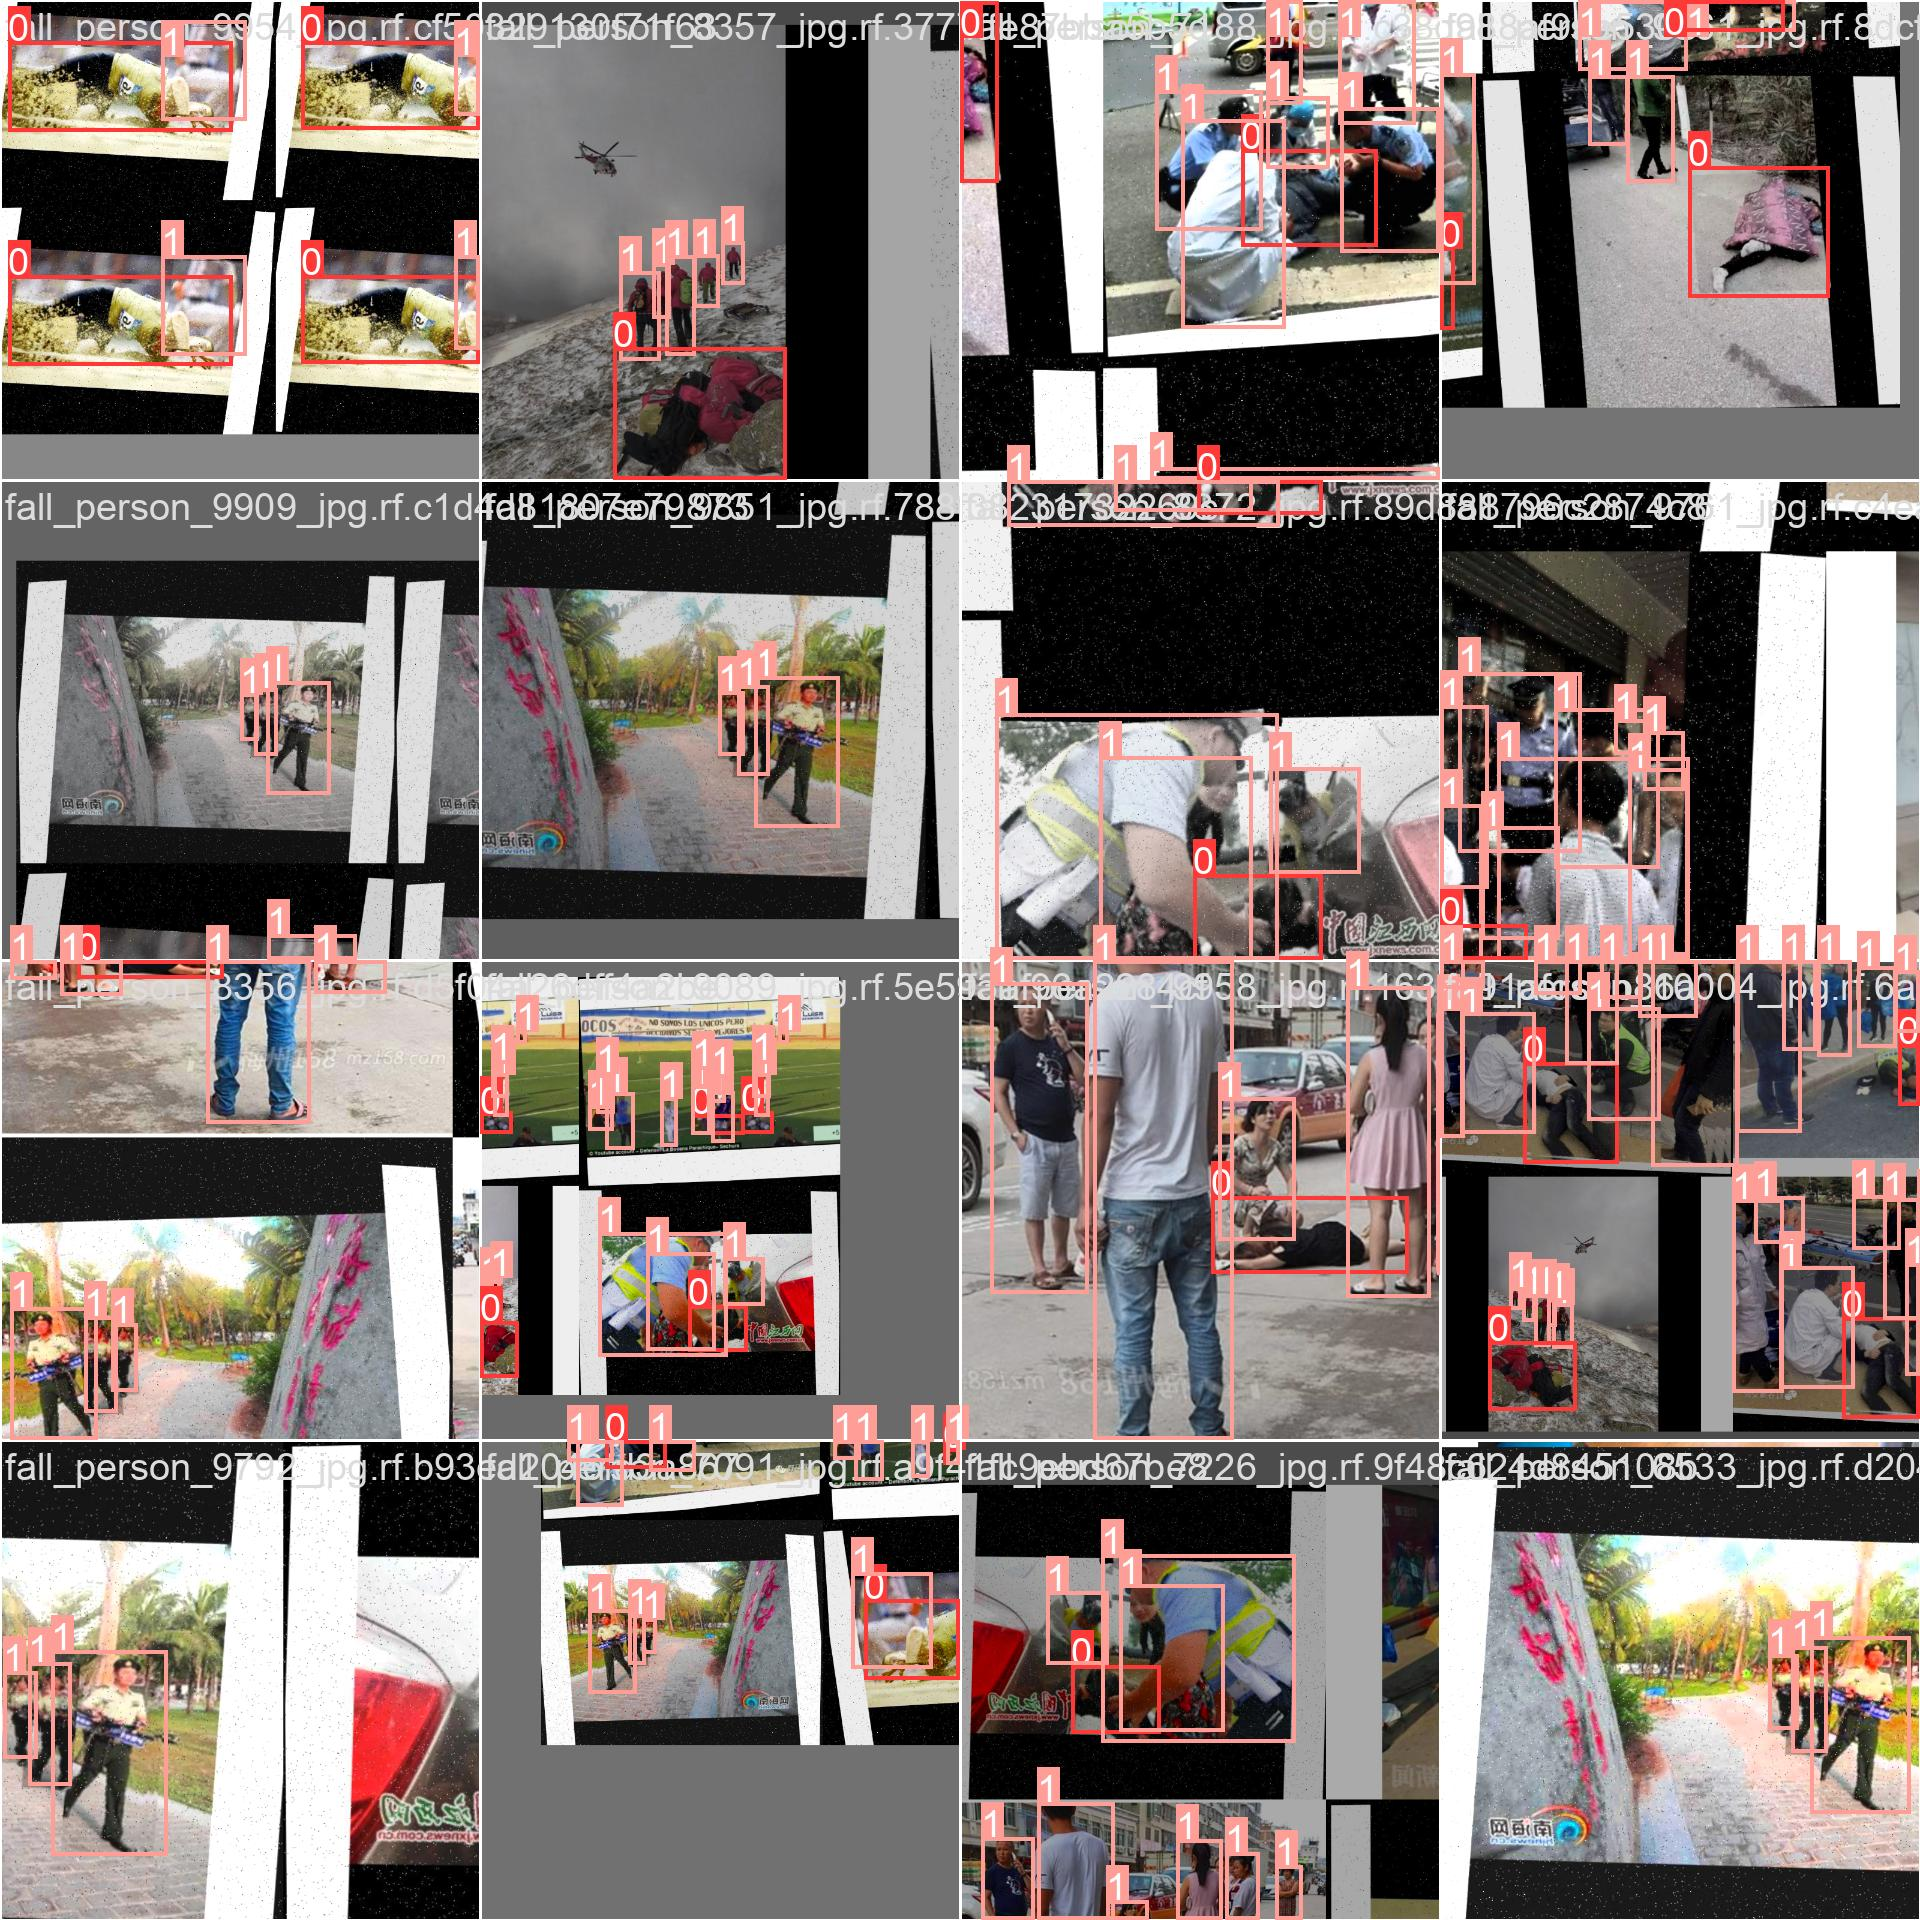

In [15]:

Image(filename=f'/content/runs/detect/train2/train_batch0.jpg', width=600)

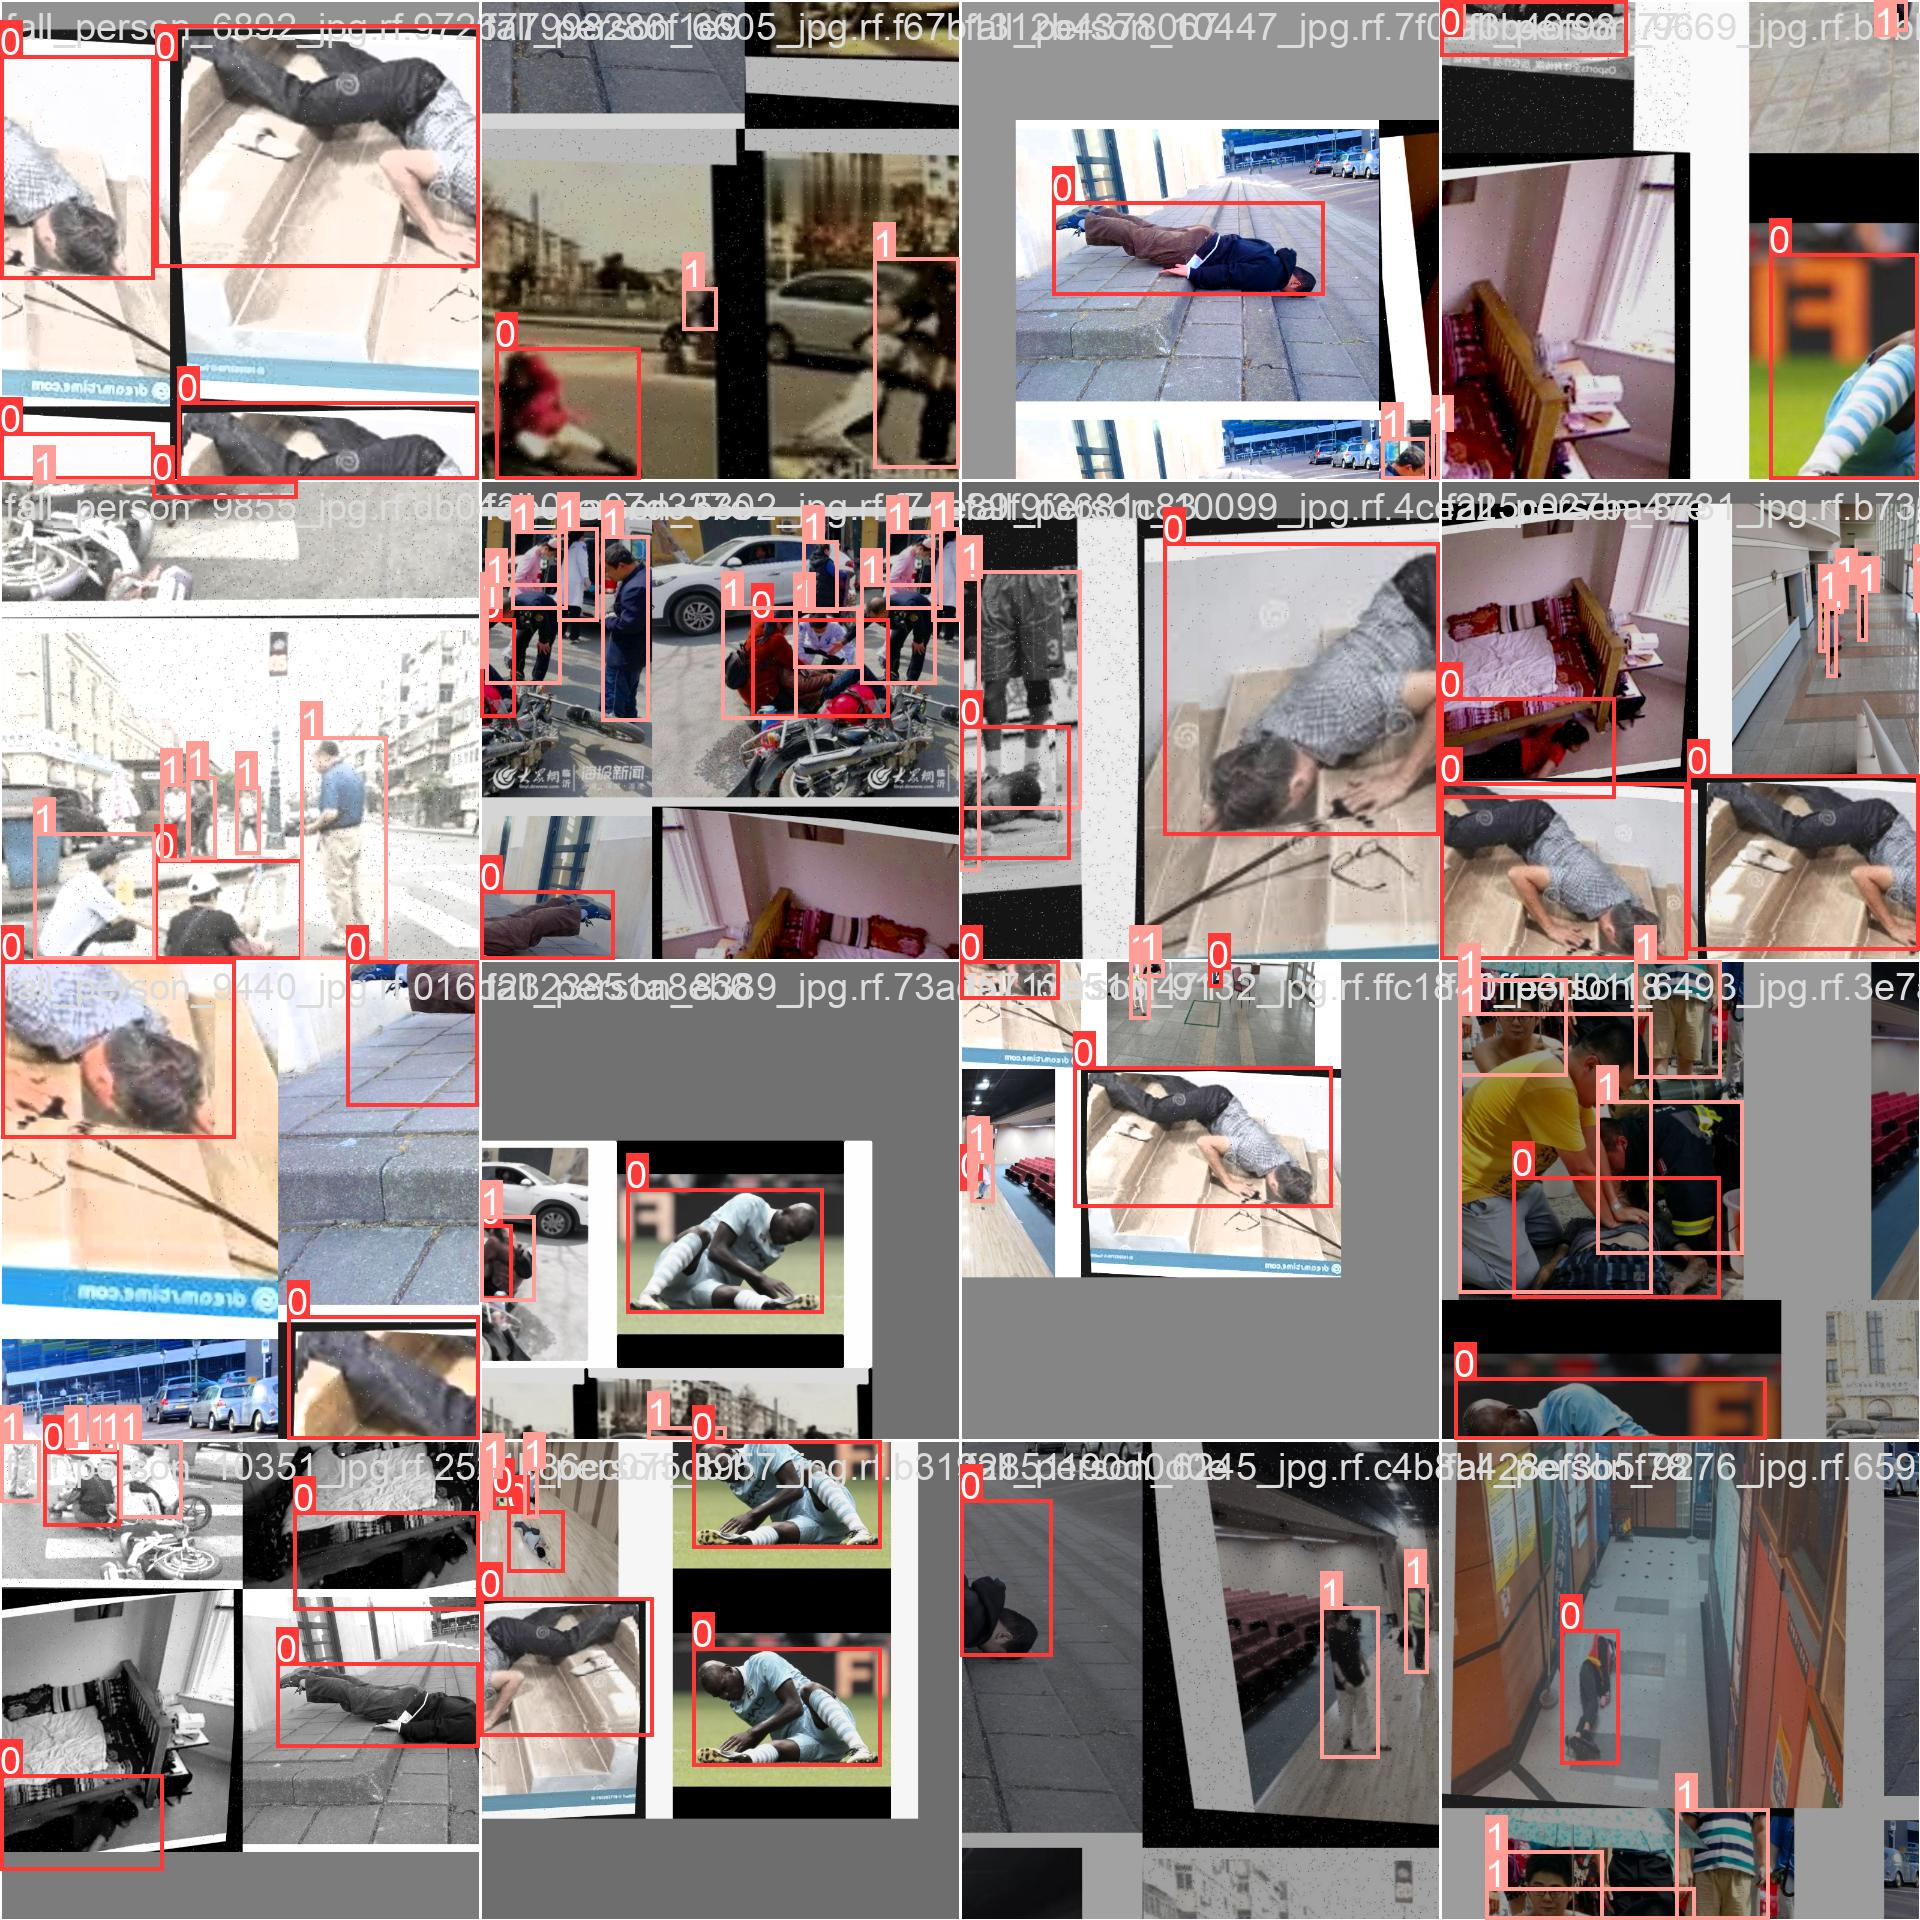

In [16]:

Image(filename=f'/content/runs/detect/train2/train_batch1.jpg', width=600)

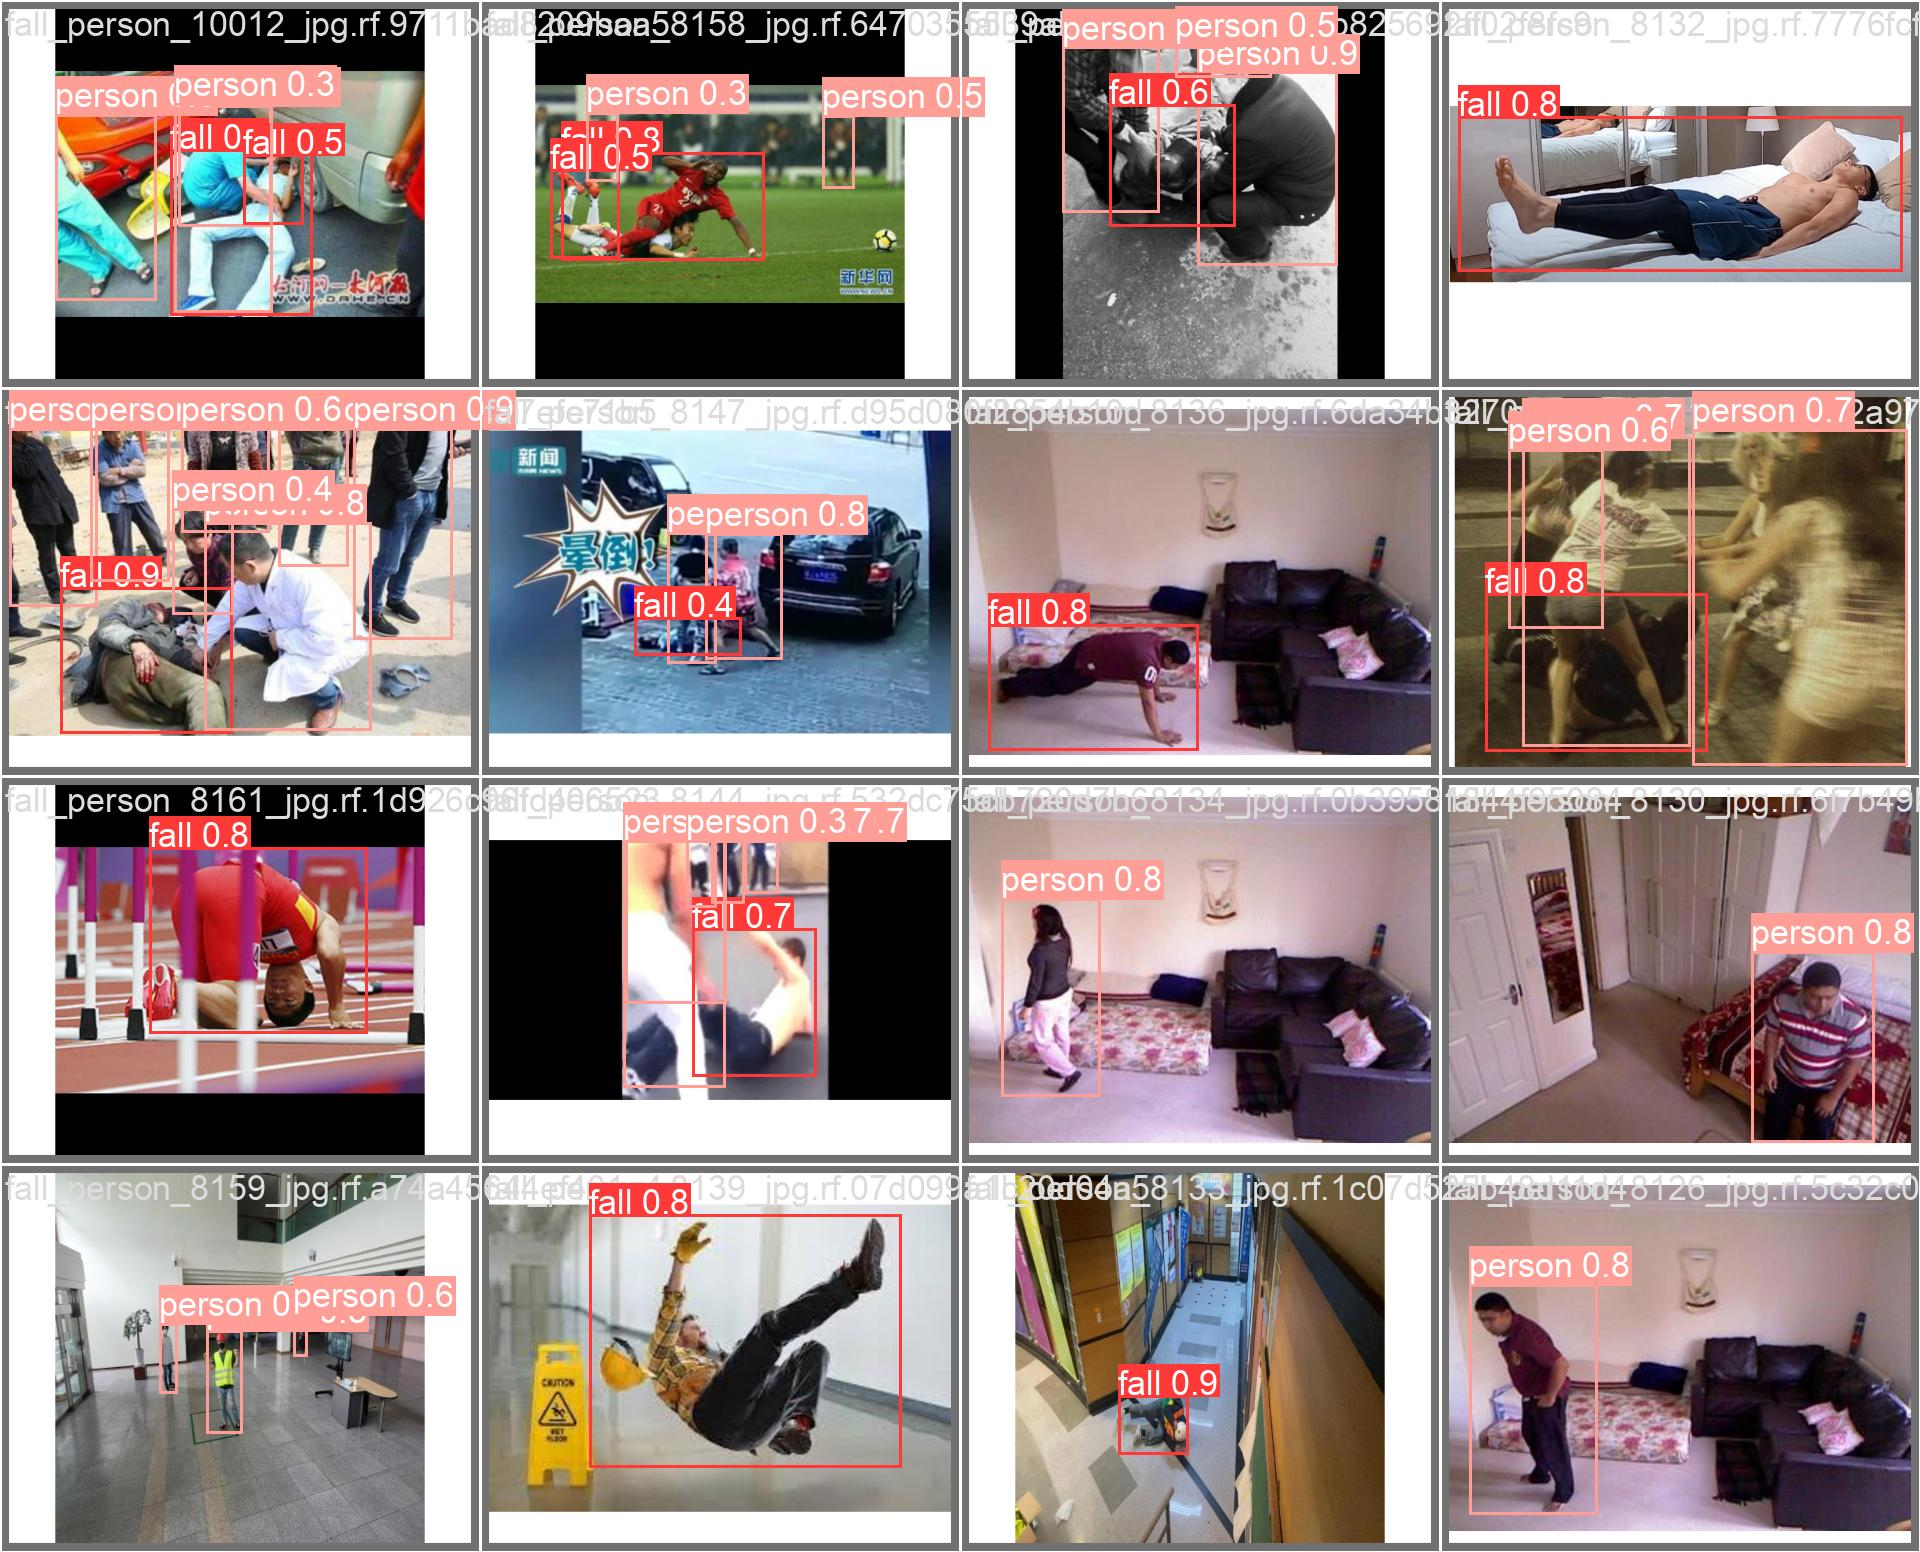

In [18]:

Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

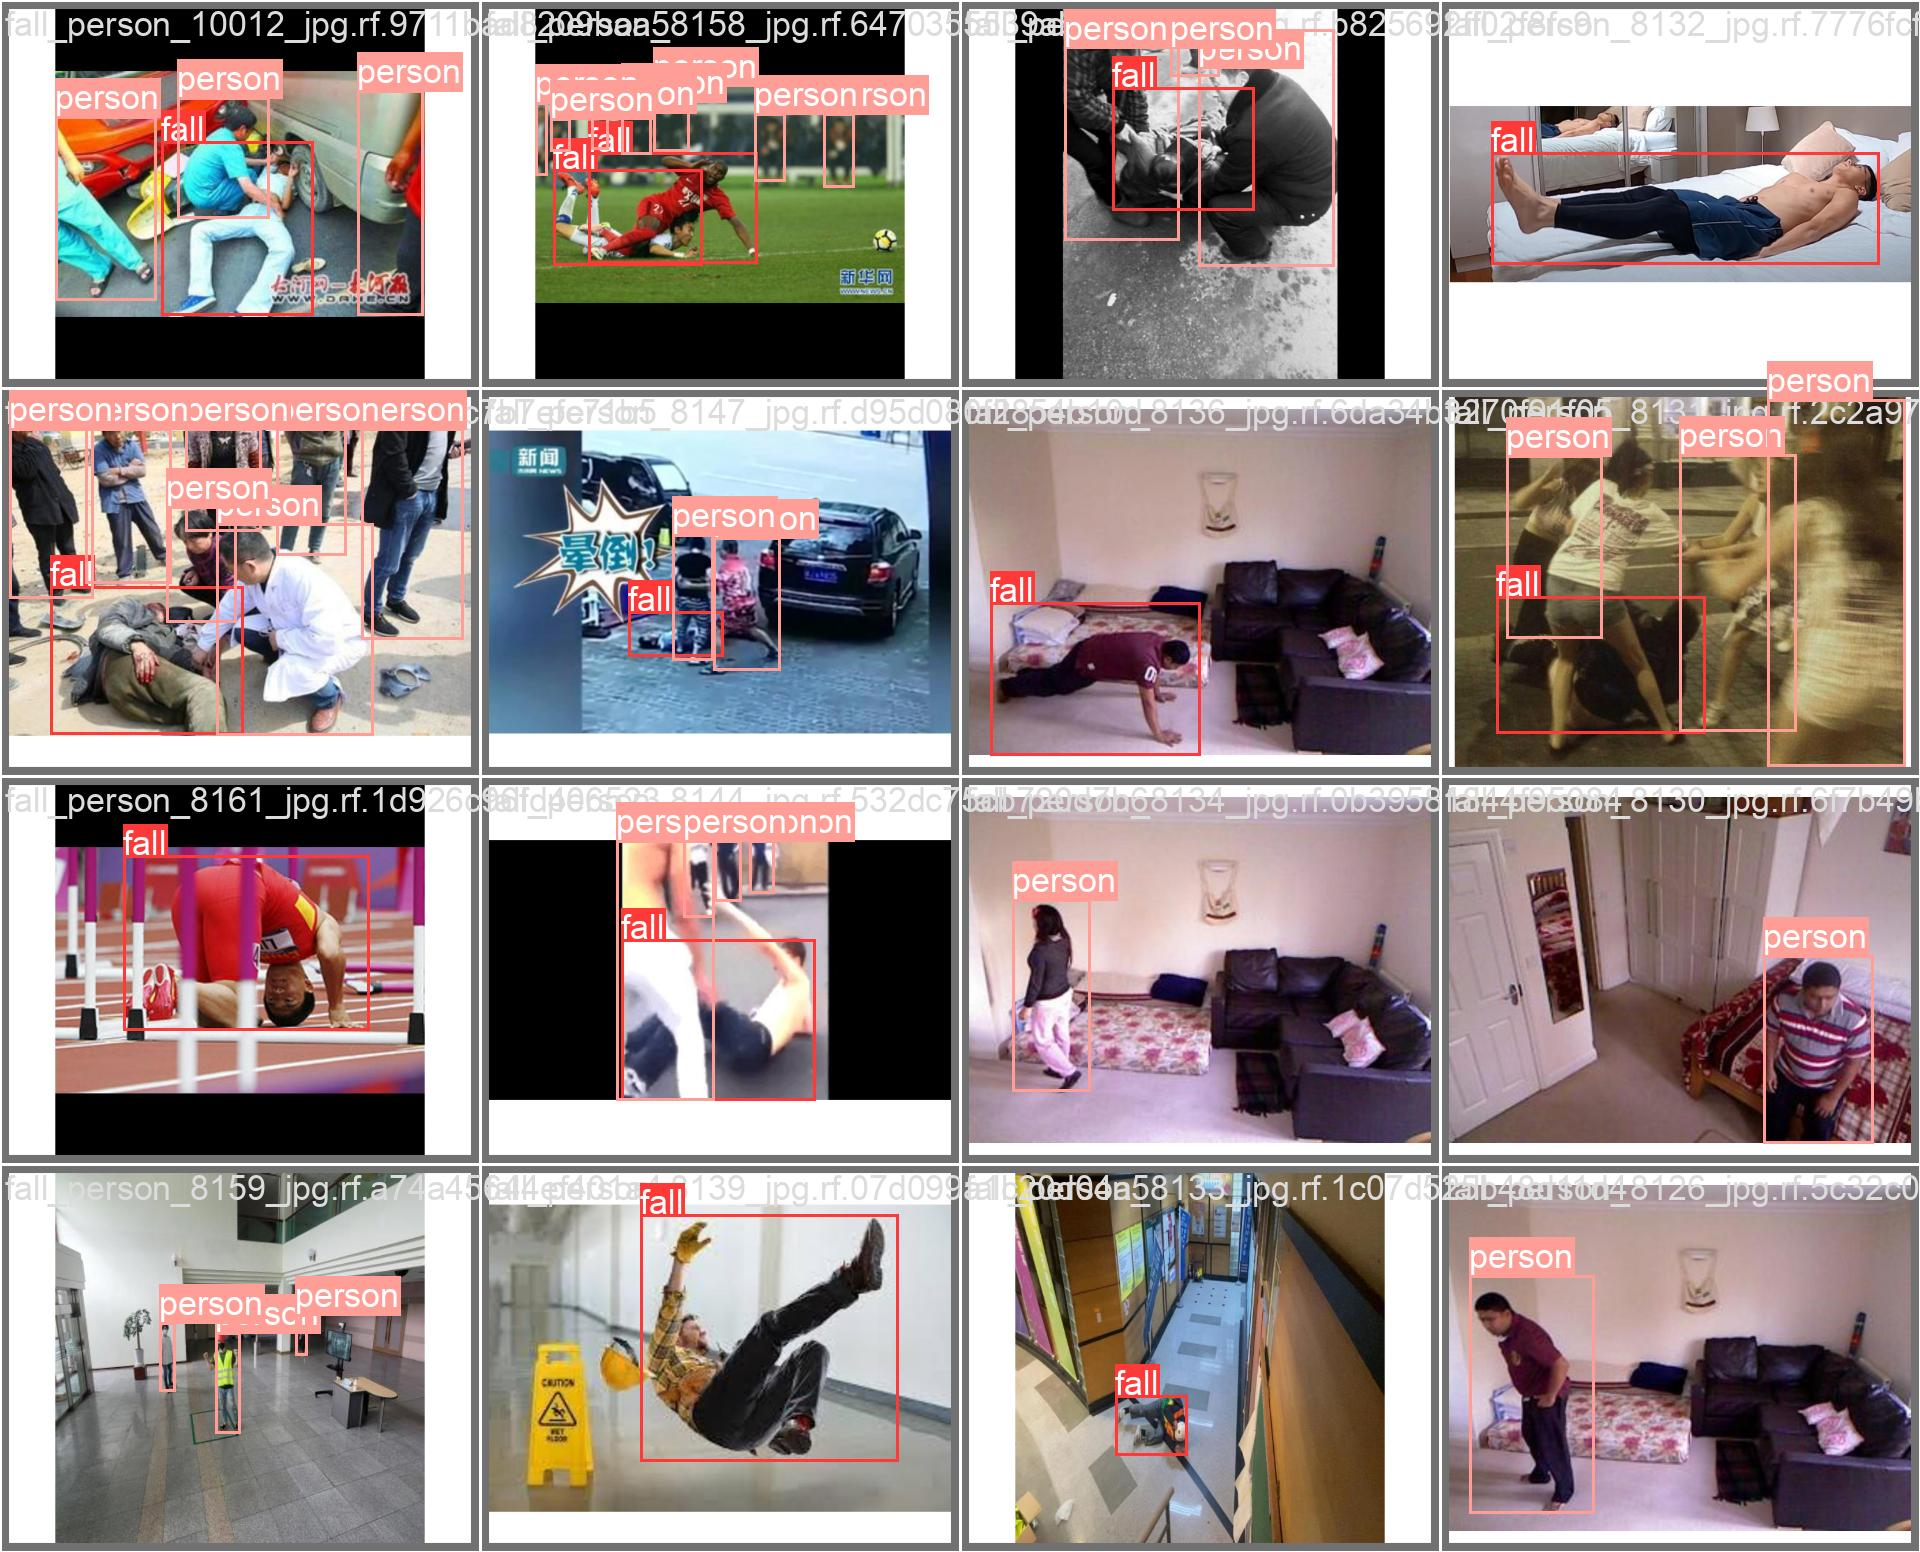

In [19]:

Image(filename=f'/content/runs/detect/train2/val_batch0_labels.jpg', width=600)

In [20]:
!yolo task = detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/datasets/Person-Fall-3/data.yaml

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Person-Fall-3/valid/labels.cache... 1511 images, 7 backgrounds, 0 corrupt: 100% 1511/1511 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 95/95 [00:34<00:00,  2.78it/s]
                   all       1511       5625      0.869      0.804      0.873      0.556
                  fall       1511       1527      0.869      0.836      0.892      0.593
                person       1511       4098      0.869      0.771      0.854      0.518
Speed: 1.1ms preprocess, 10.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


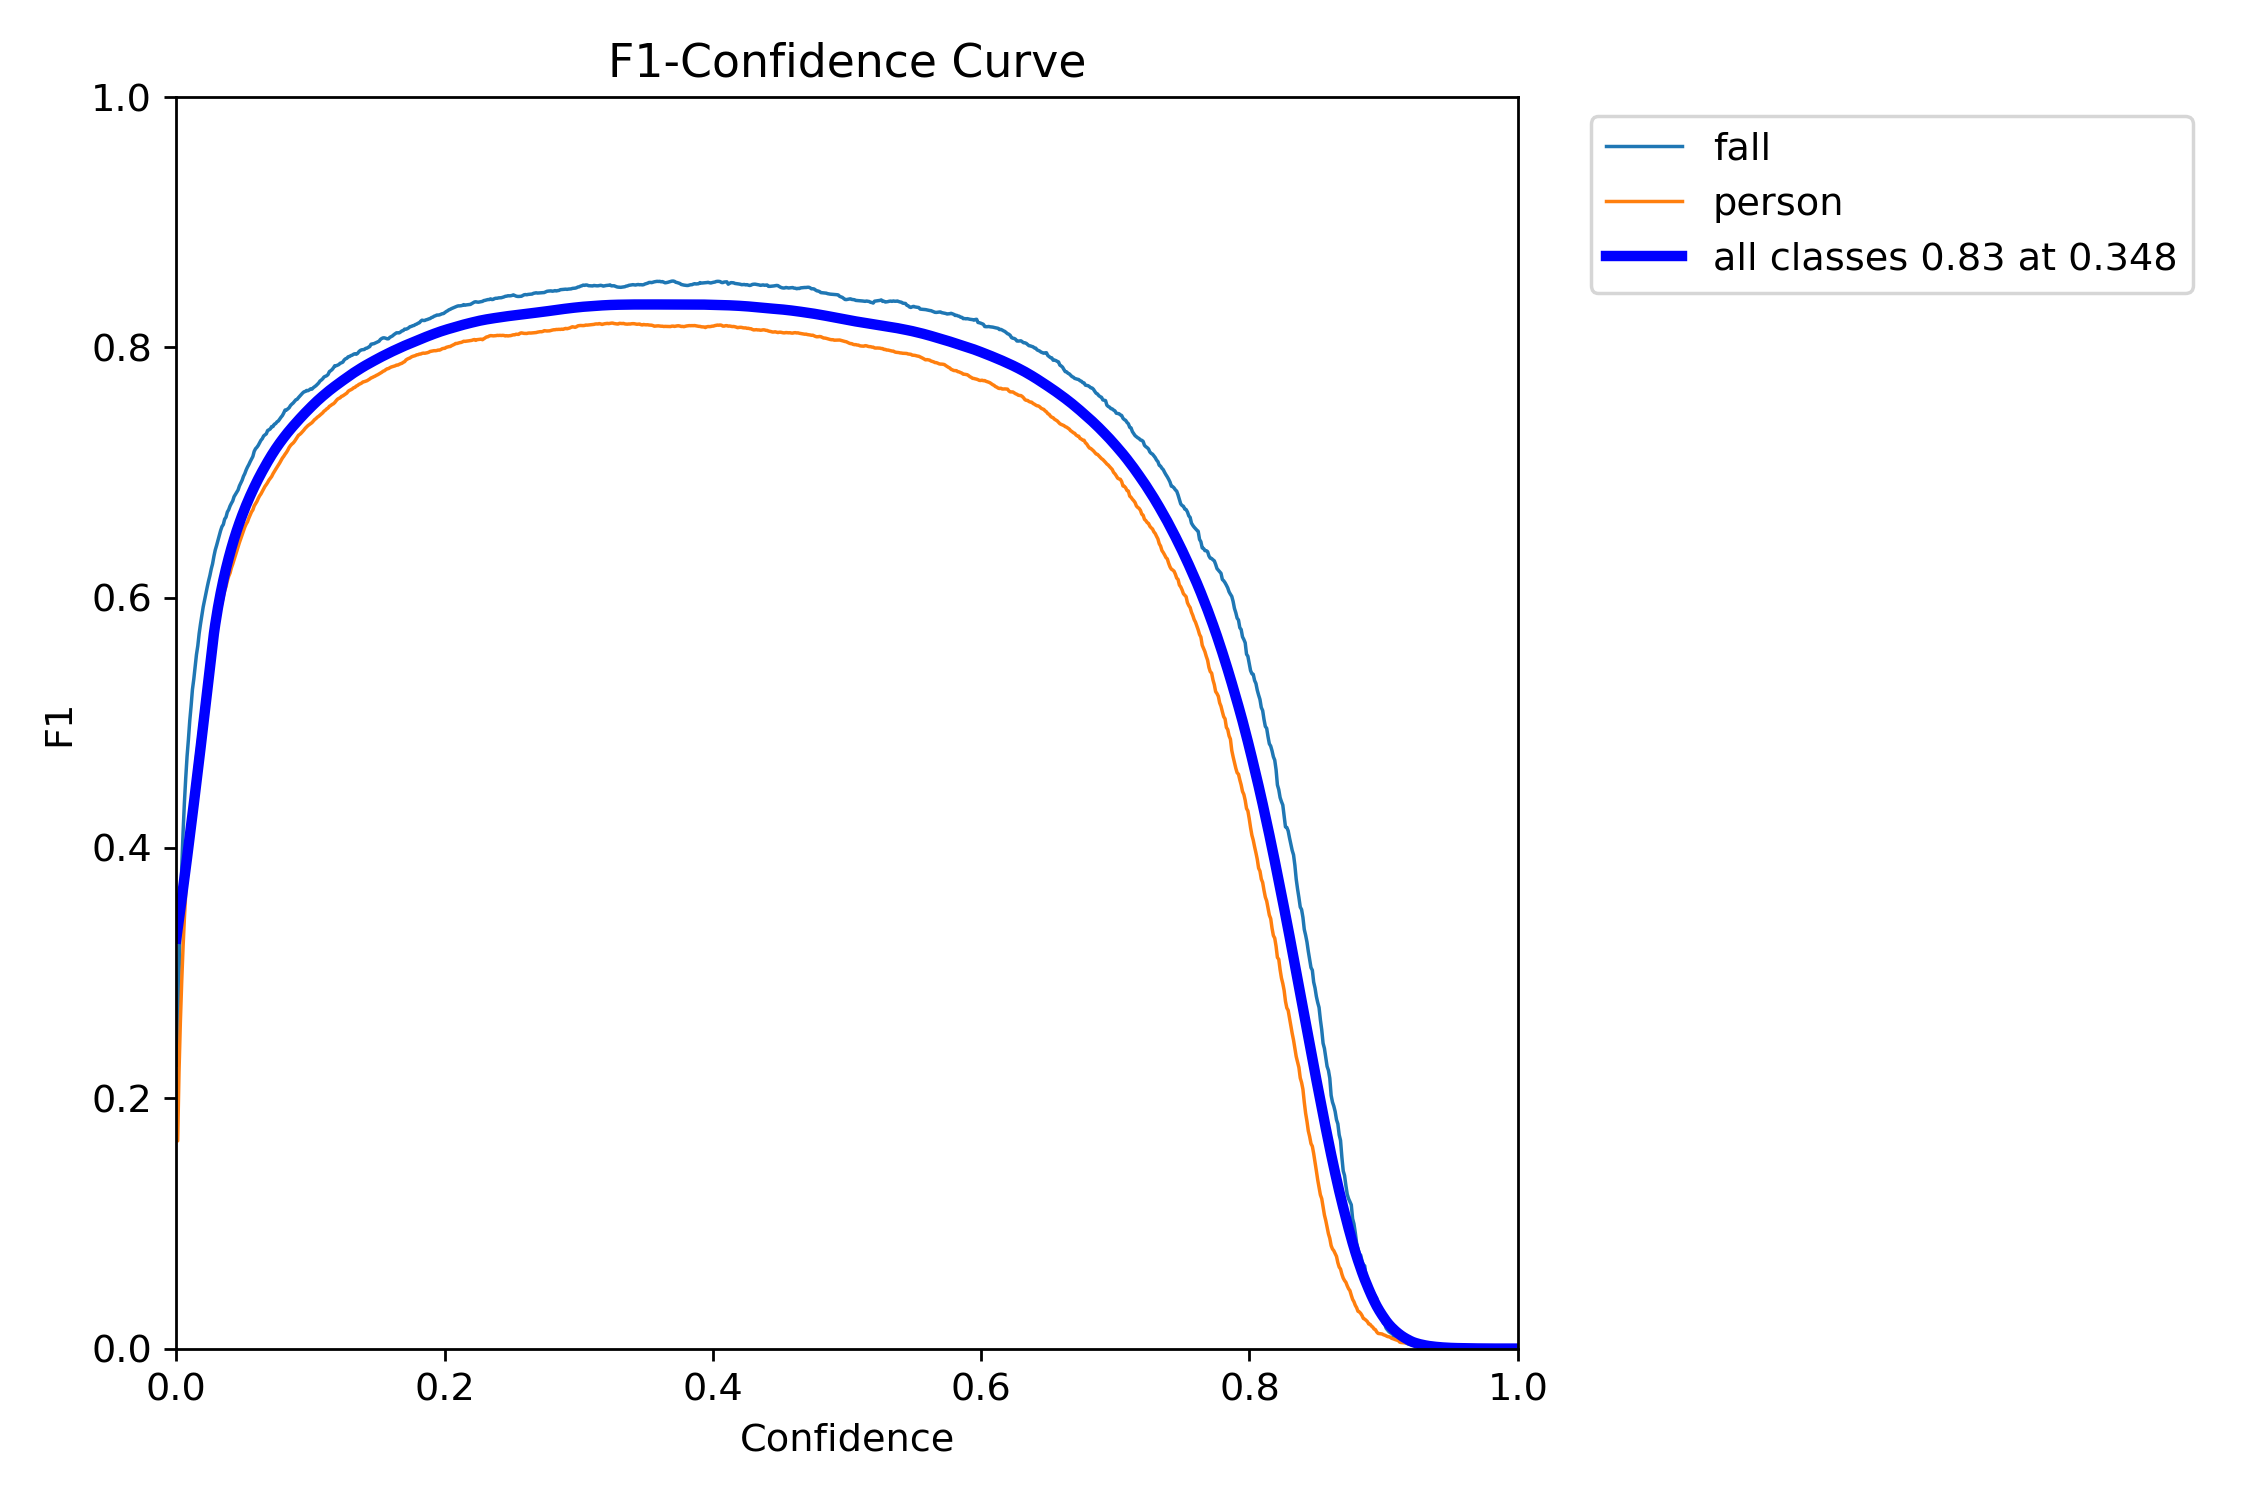

In [22]:

Image(filename=f'/content/runs/detect/train2/F1_curve.png', width=600)

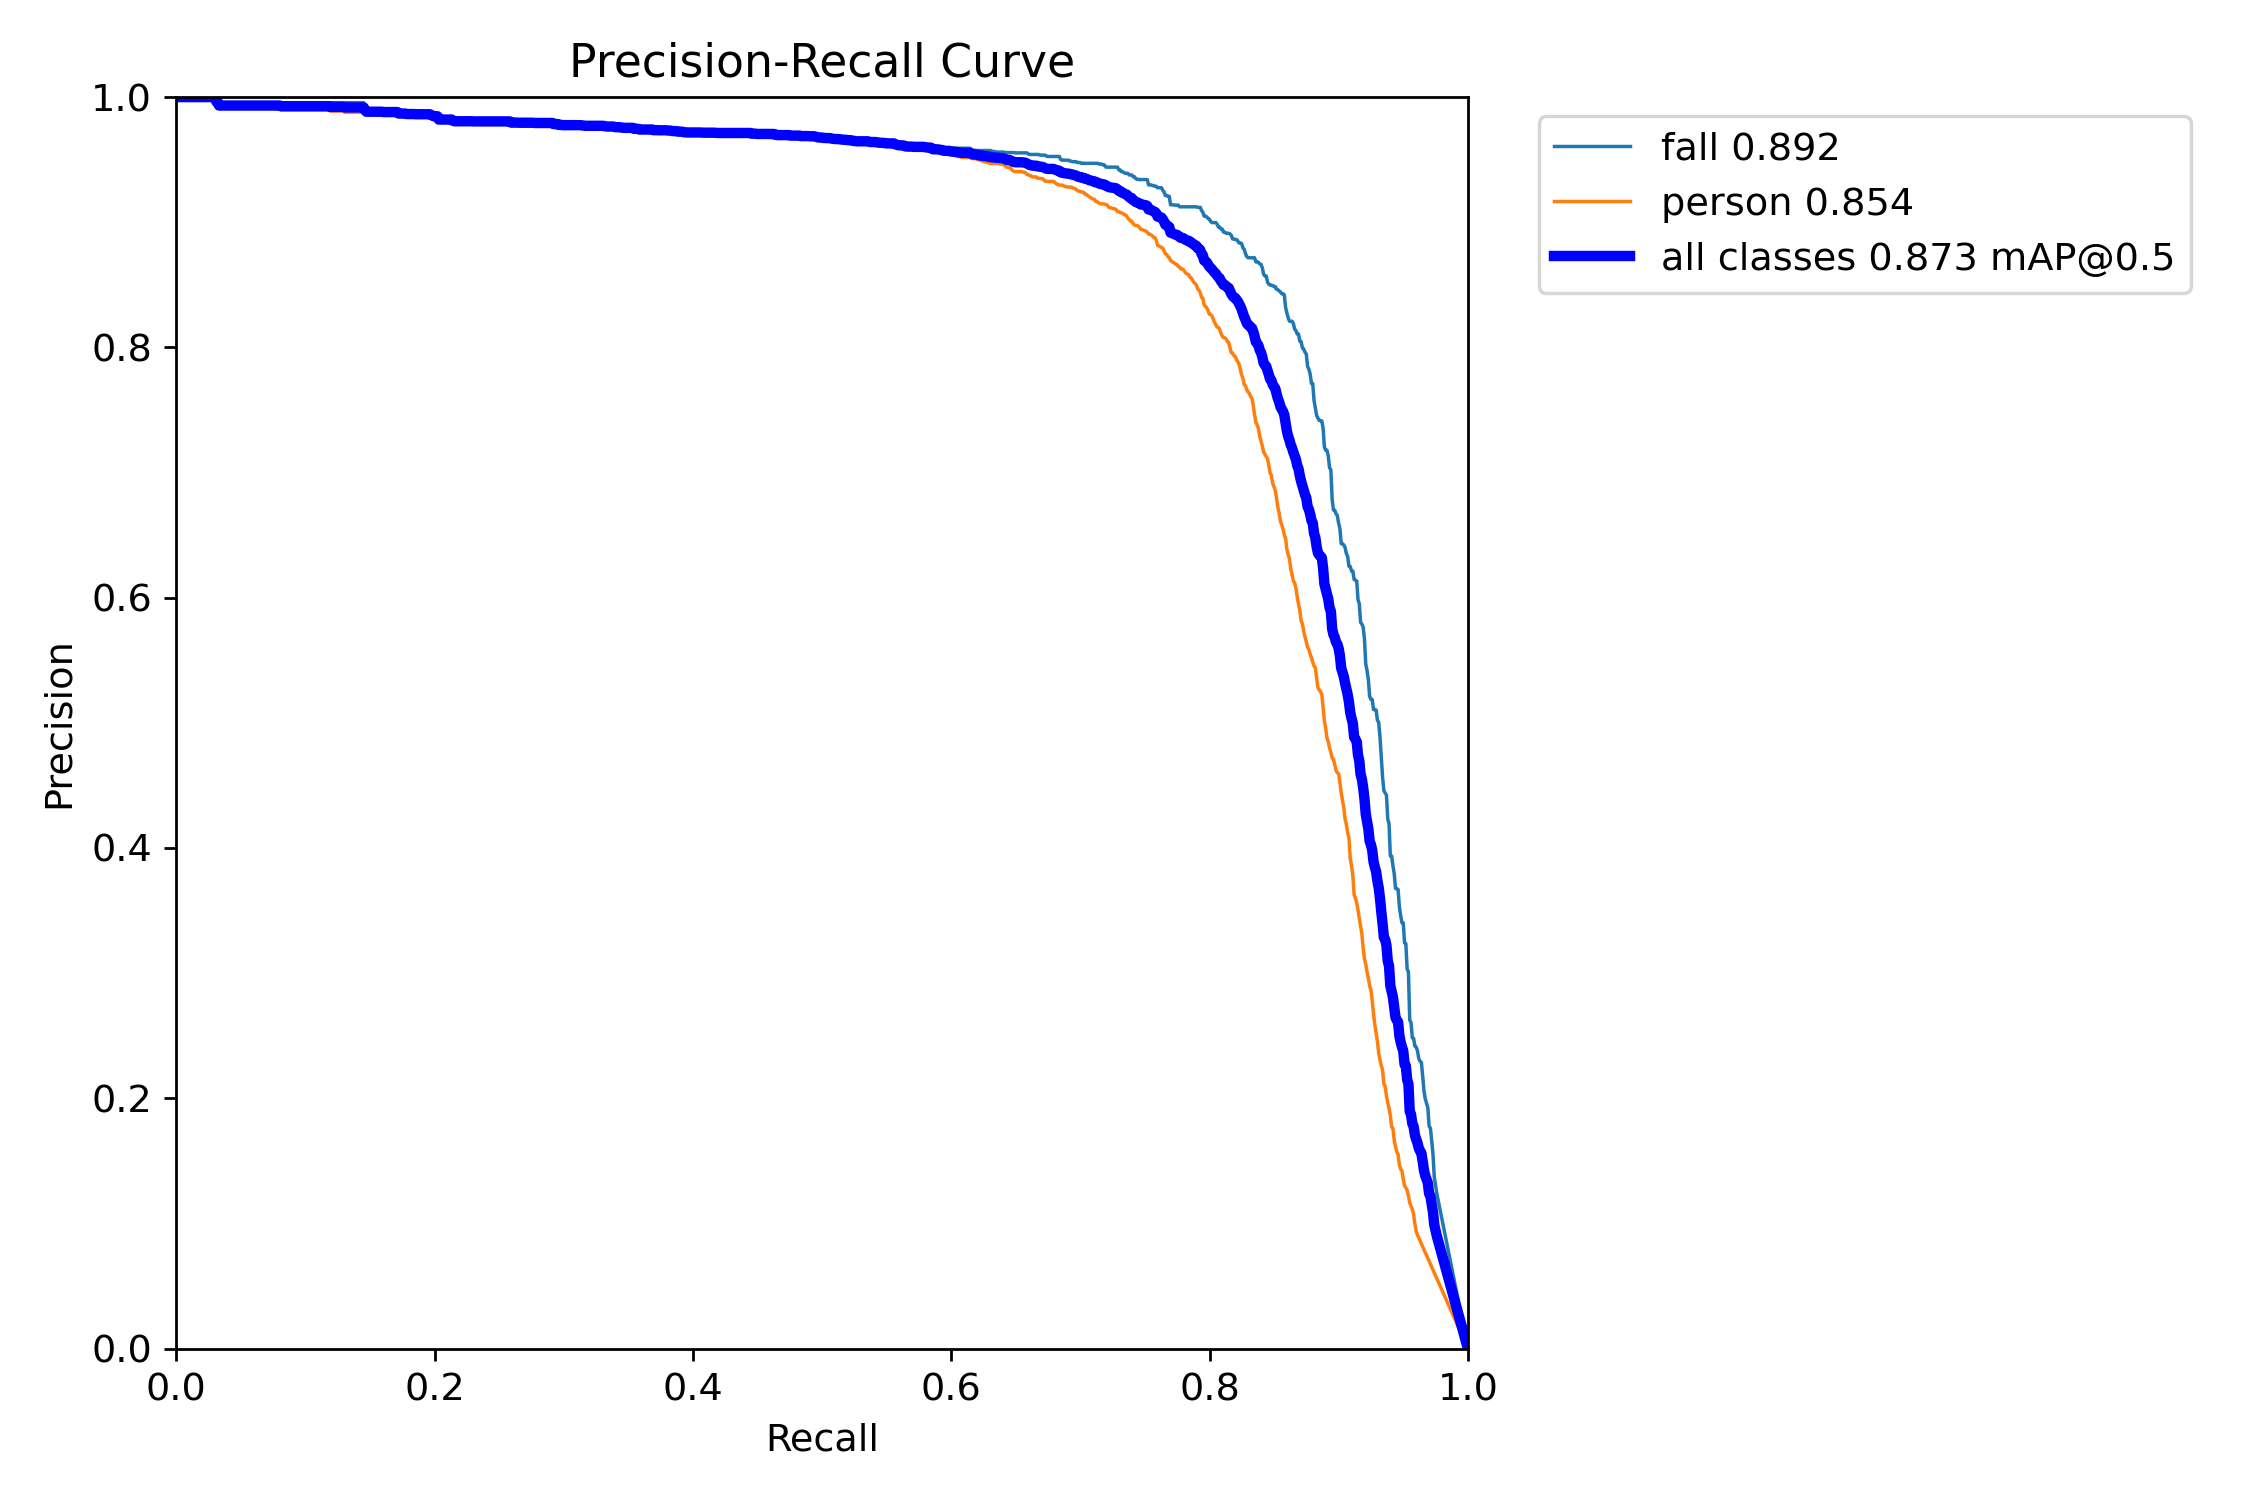

In [23]:

Image(filename=f'/content/runs/detect/train2/PR_curve.png', width=600)

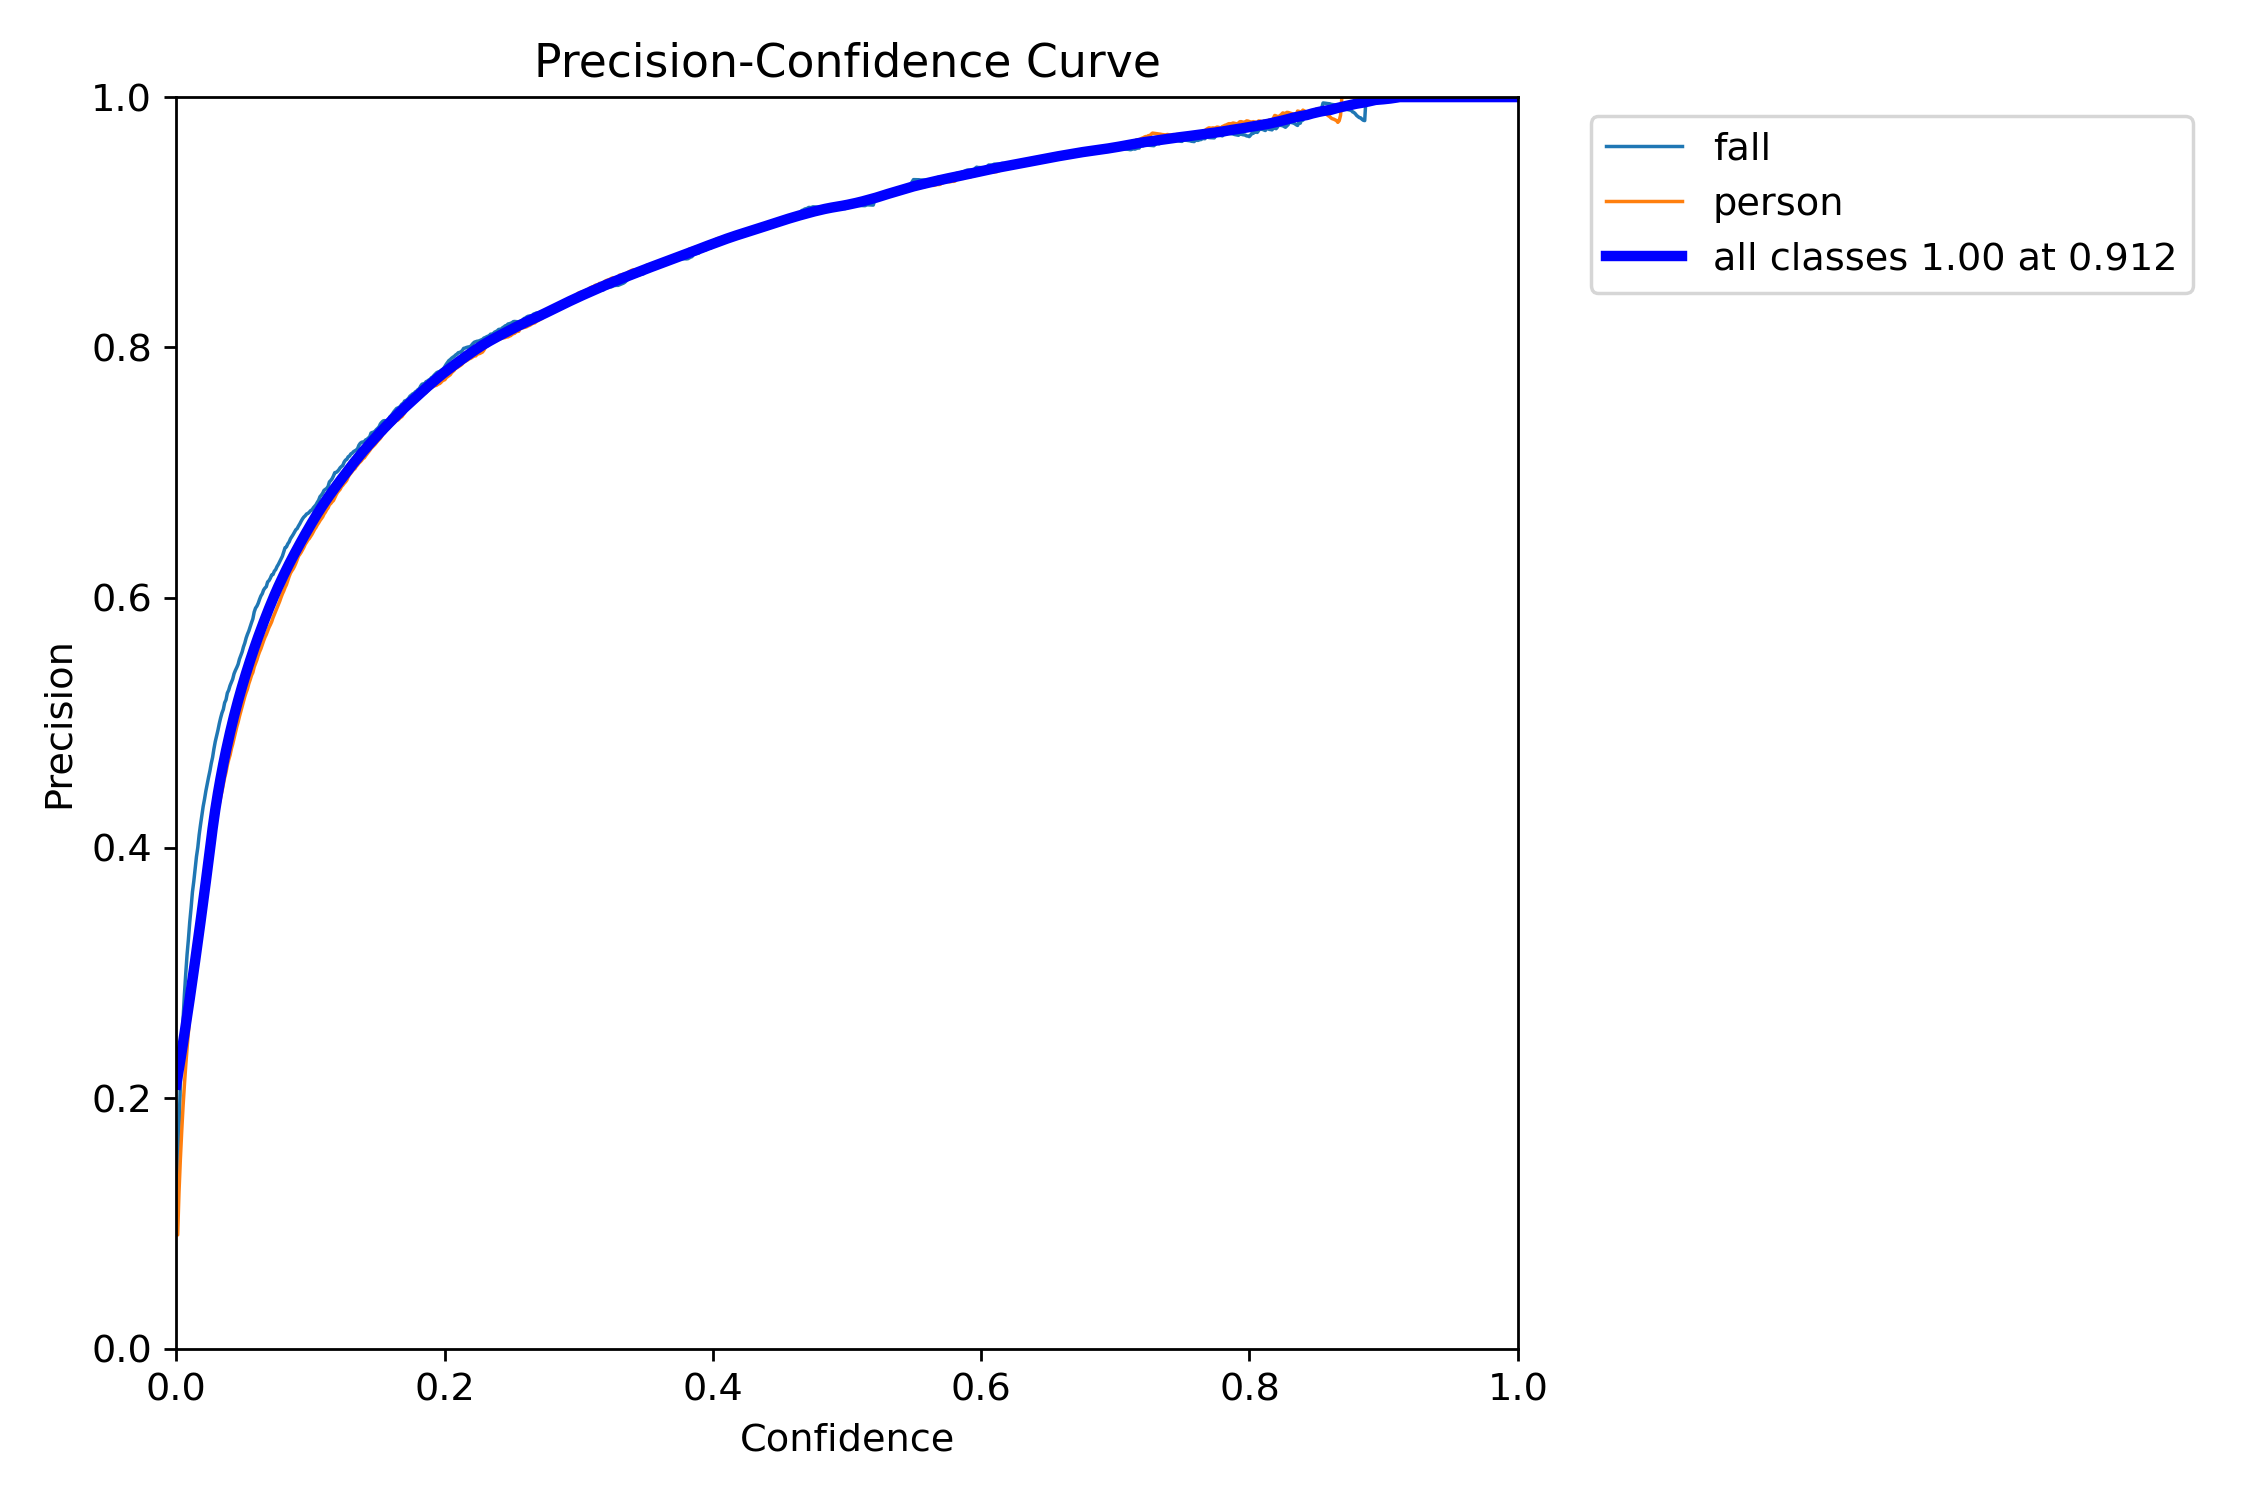

In [24]:

Image(filename=f'/content/runs/detect/train2/P_curve.png', width=600)

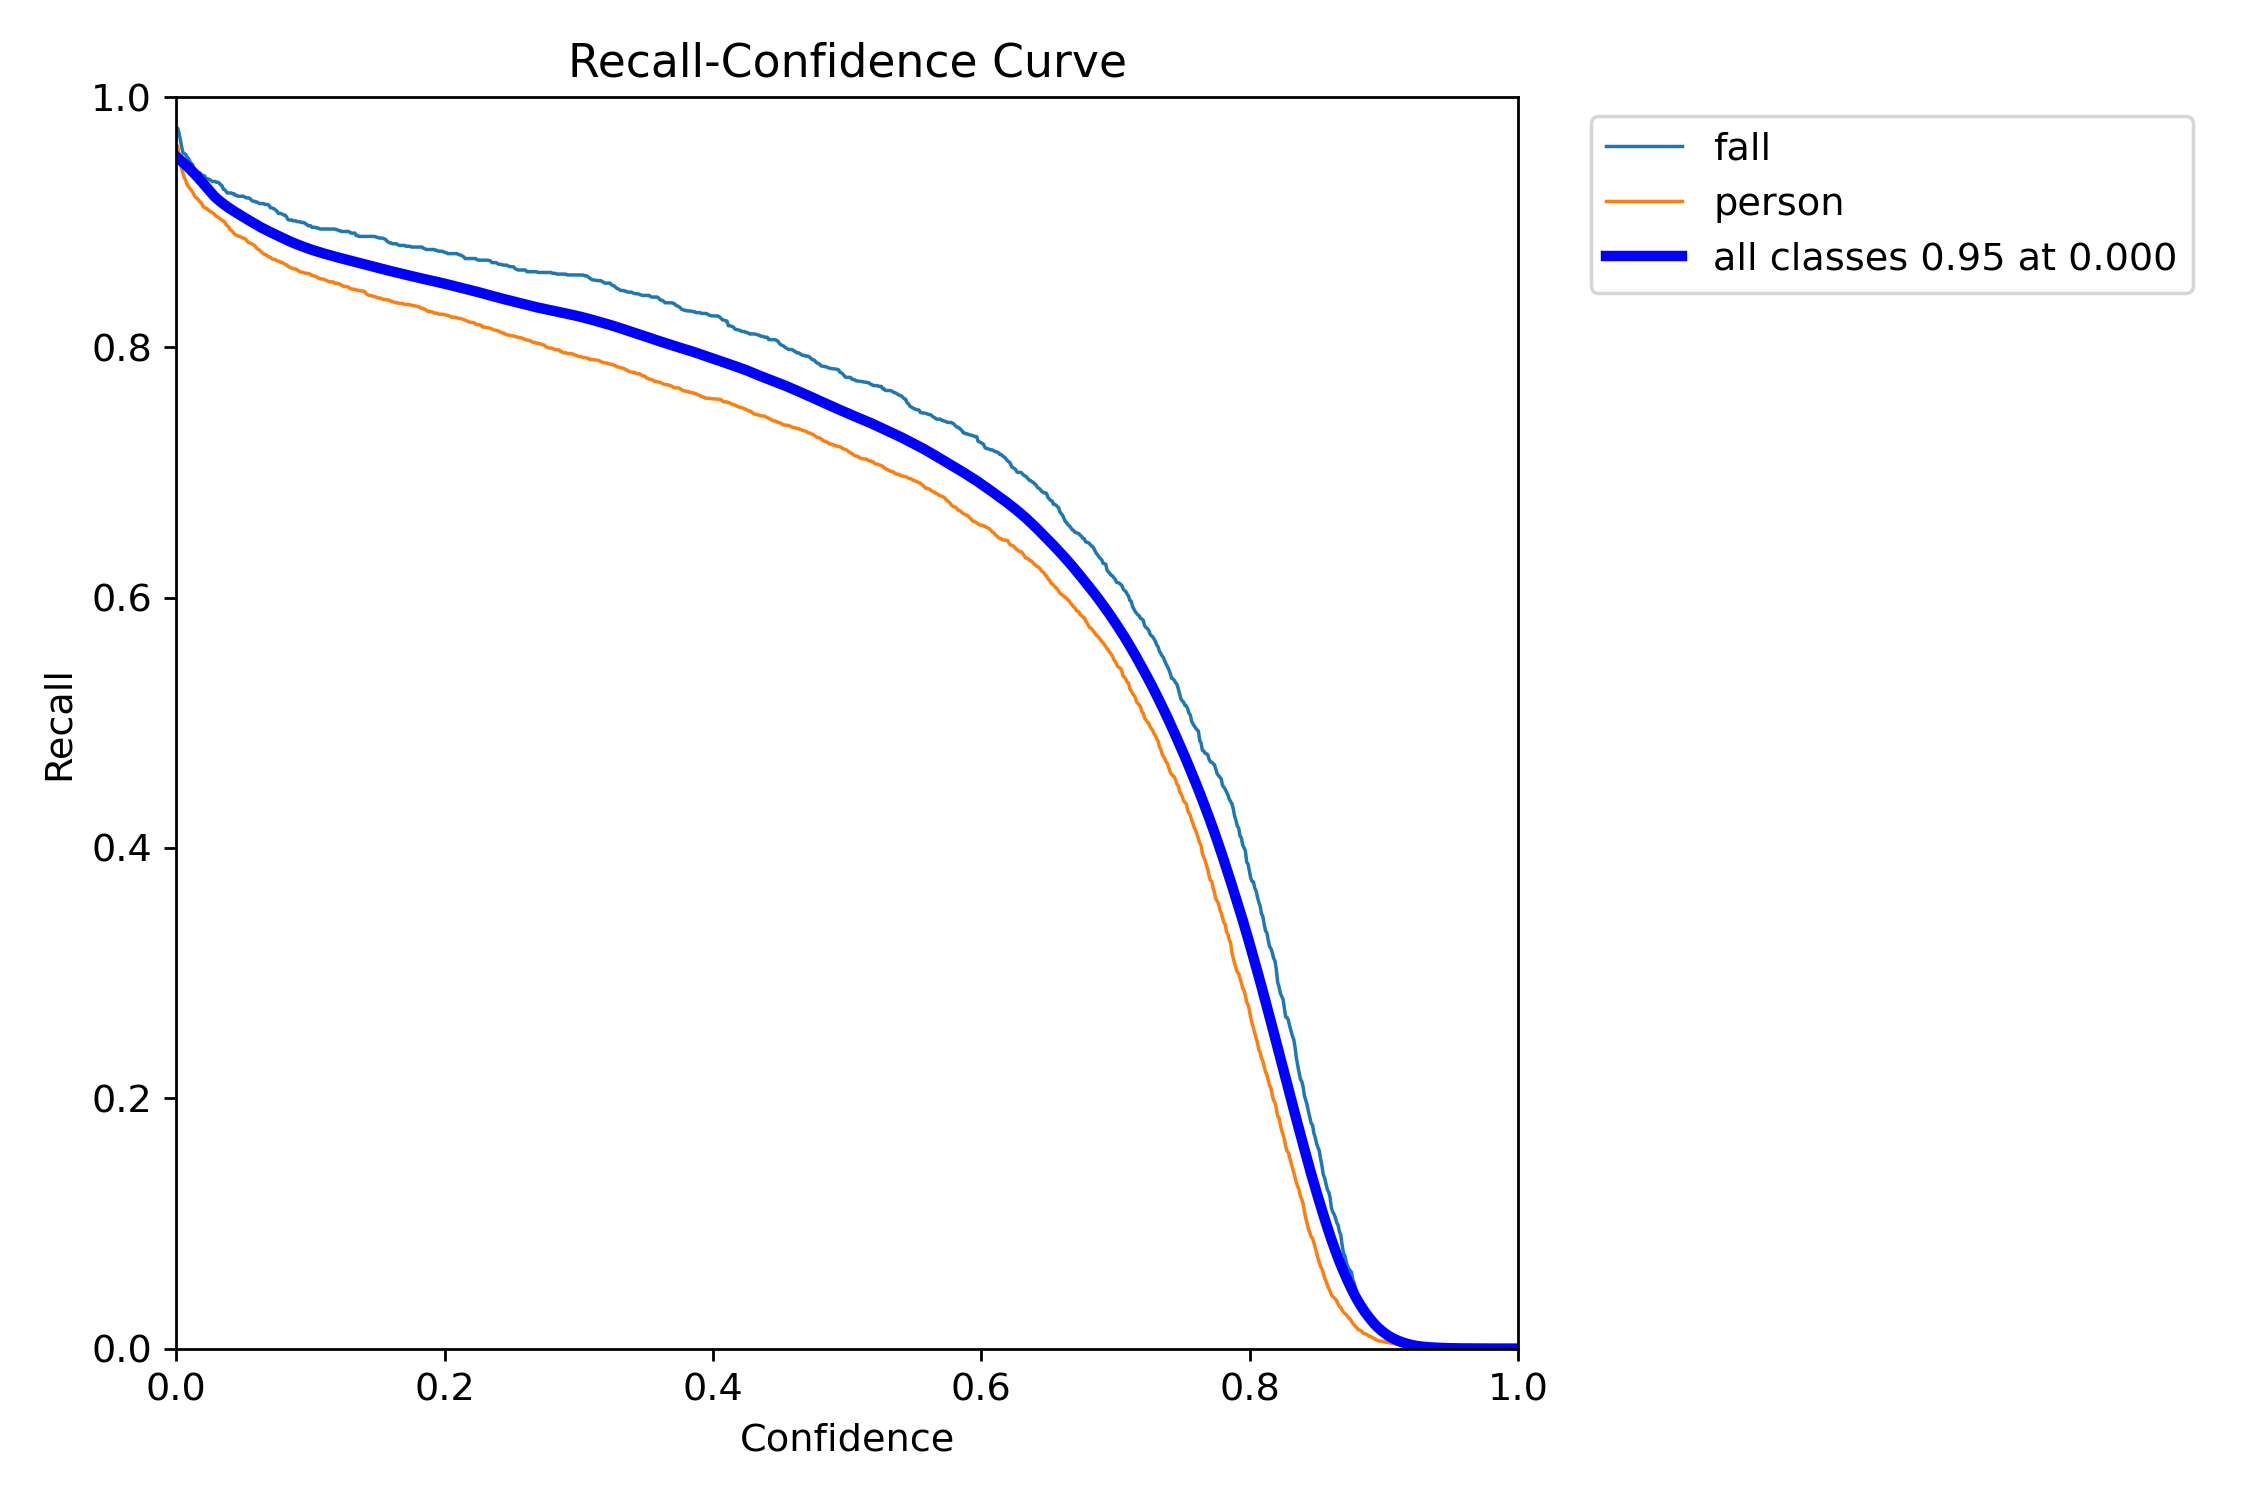

In [25]:

Image(filename=f'/content/runs/detect/train2/R_curve.png', width=600)

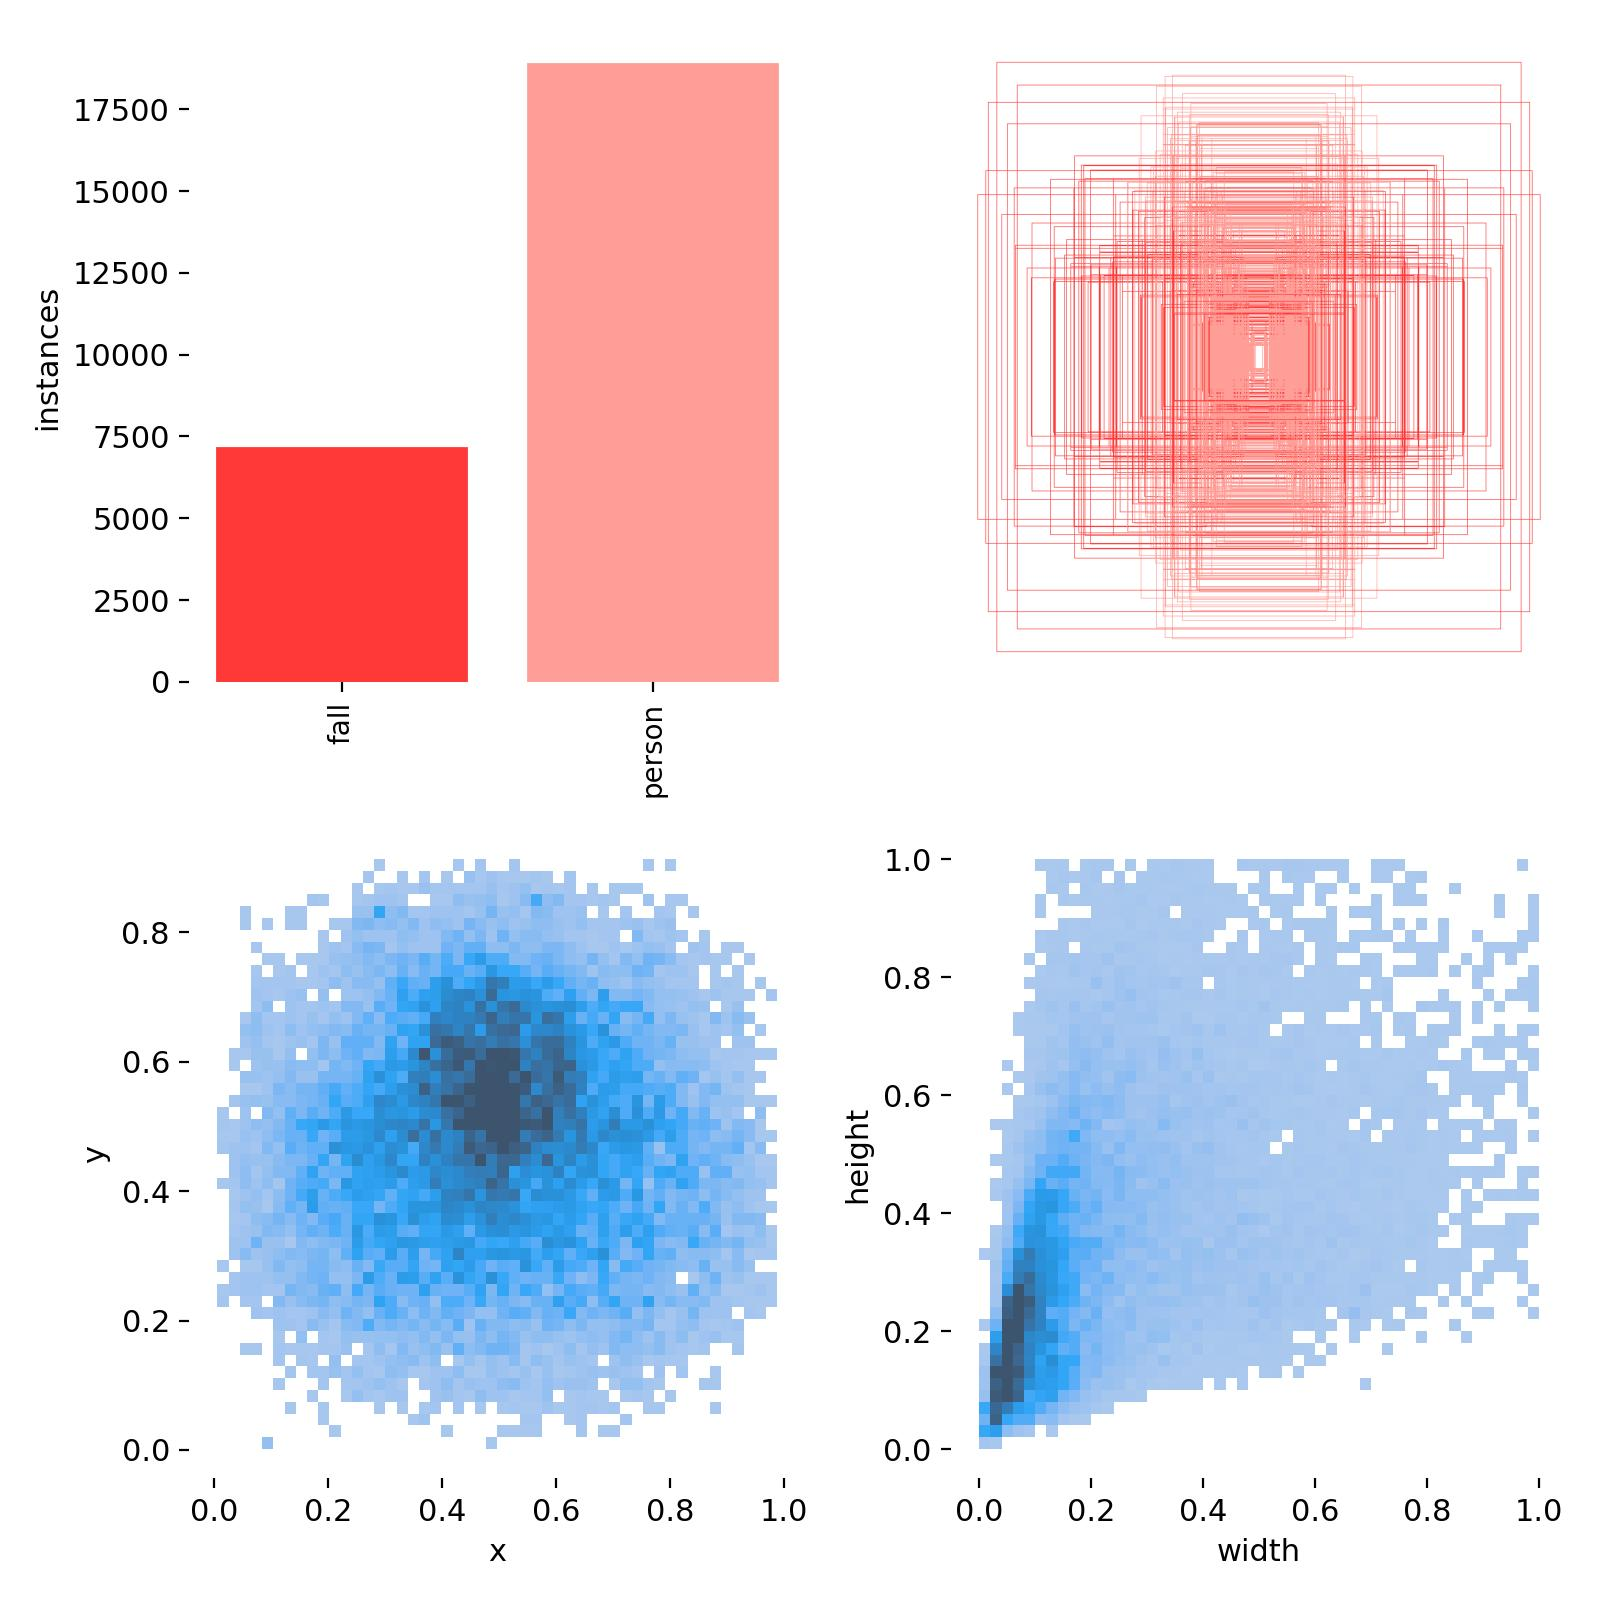

In [26]:

Image(filename=f'/content/runs/detect/train2/labels.jpg', width=600)

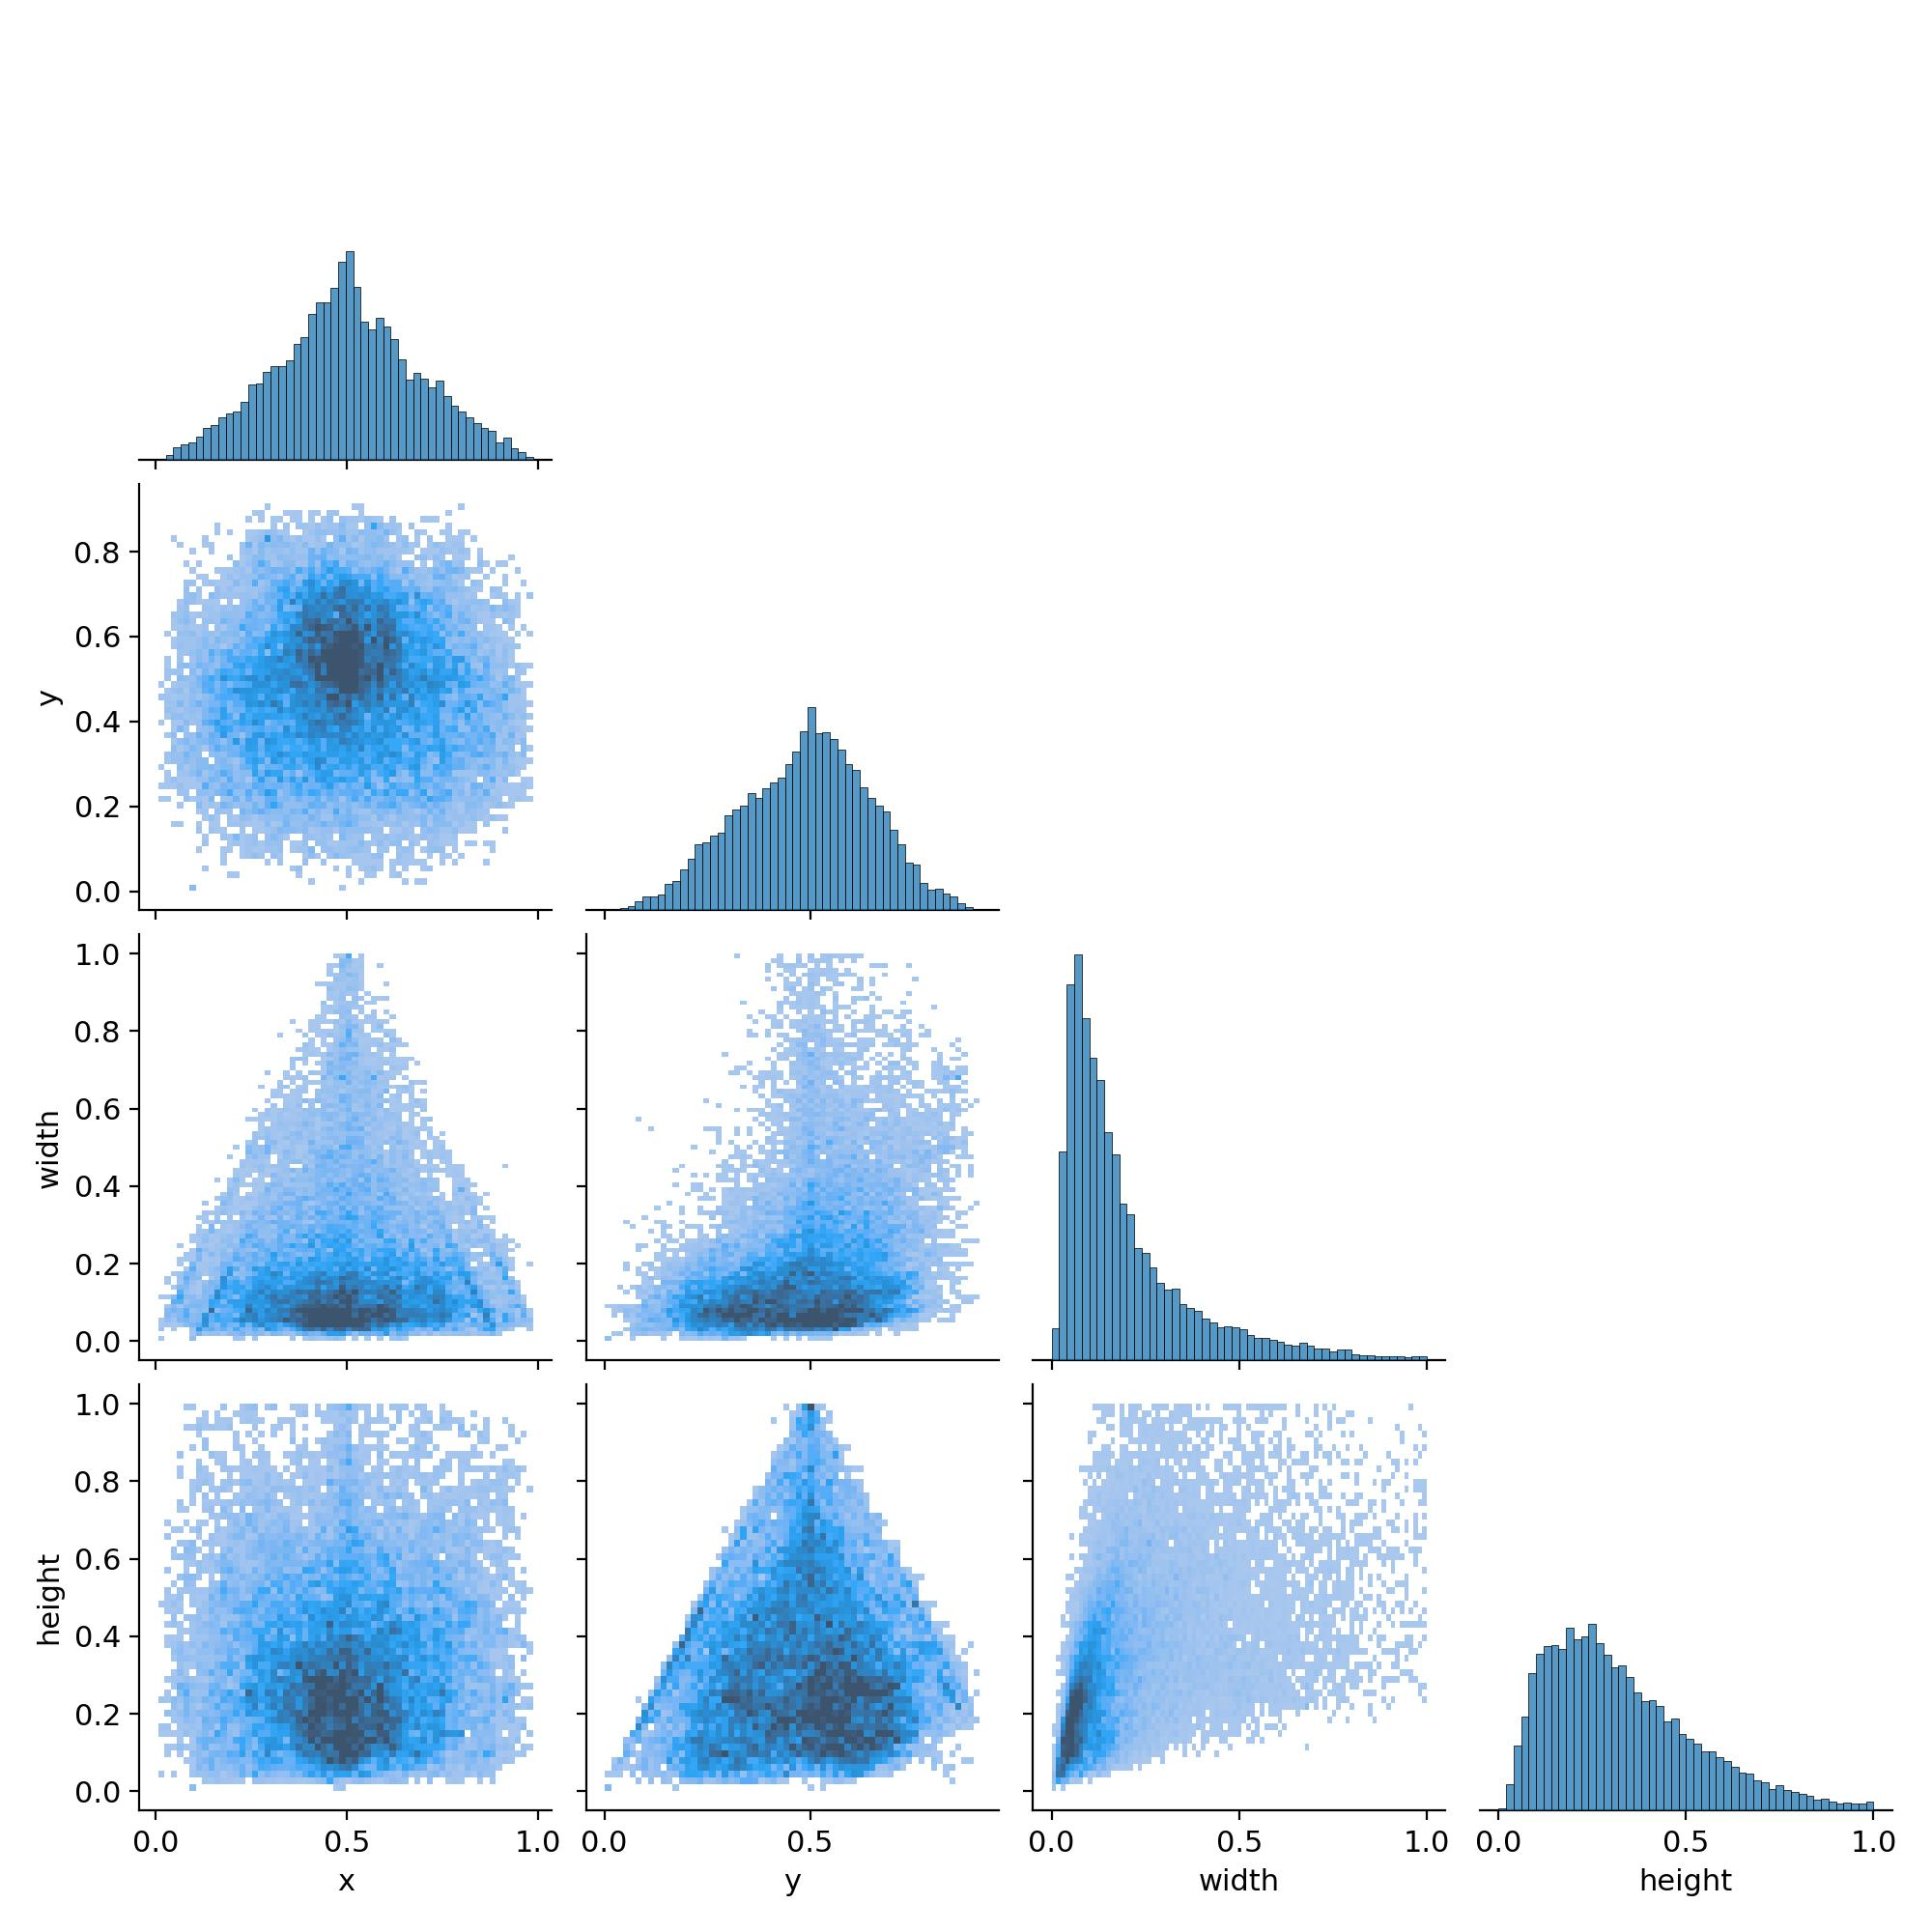

In [27]:

Image(filename=f'/content/runs/detect/train2/labels_correlogram.jpg', width=600)

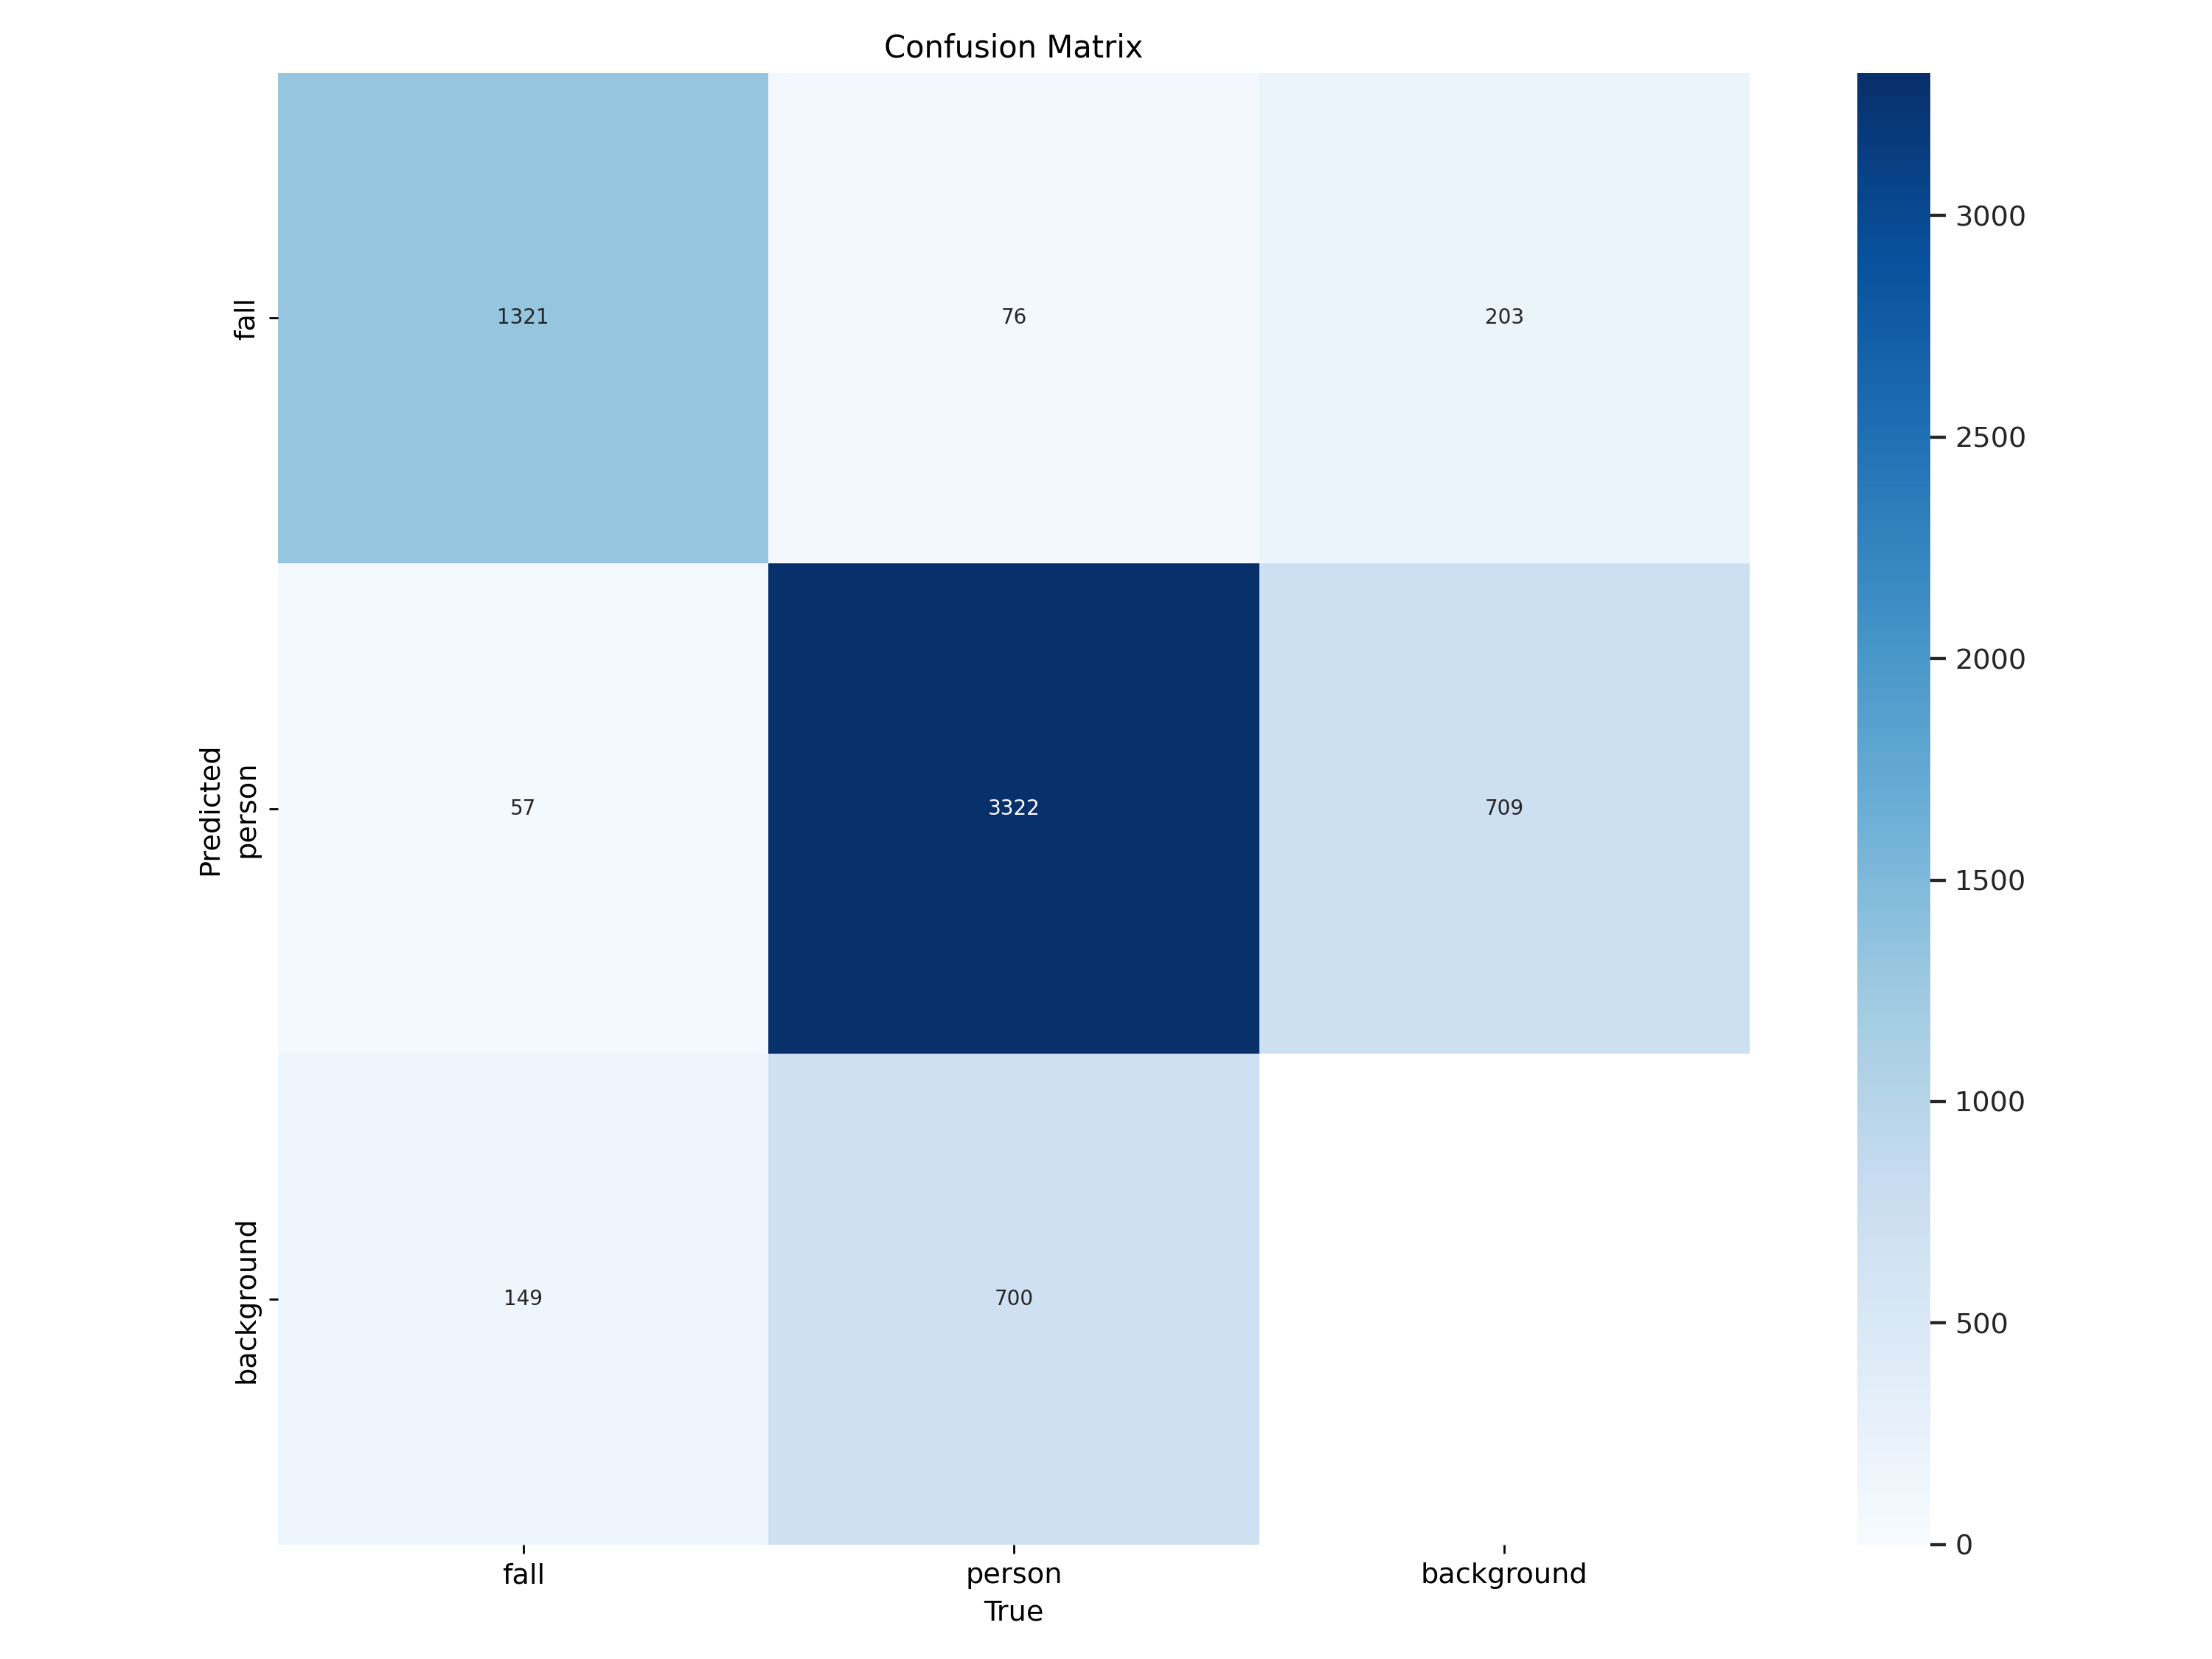

In [28]:

Image(filename=f'/content/runs/detect/val/confusion_matrix.png', width=600)

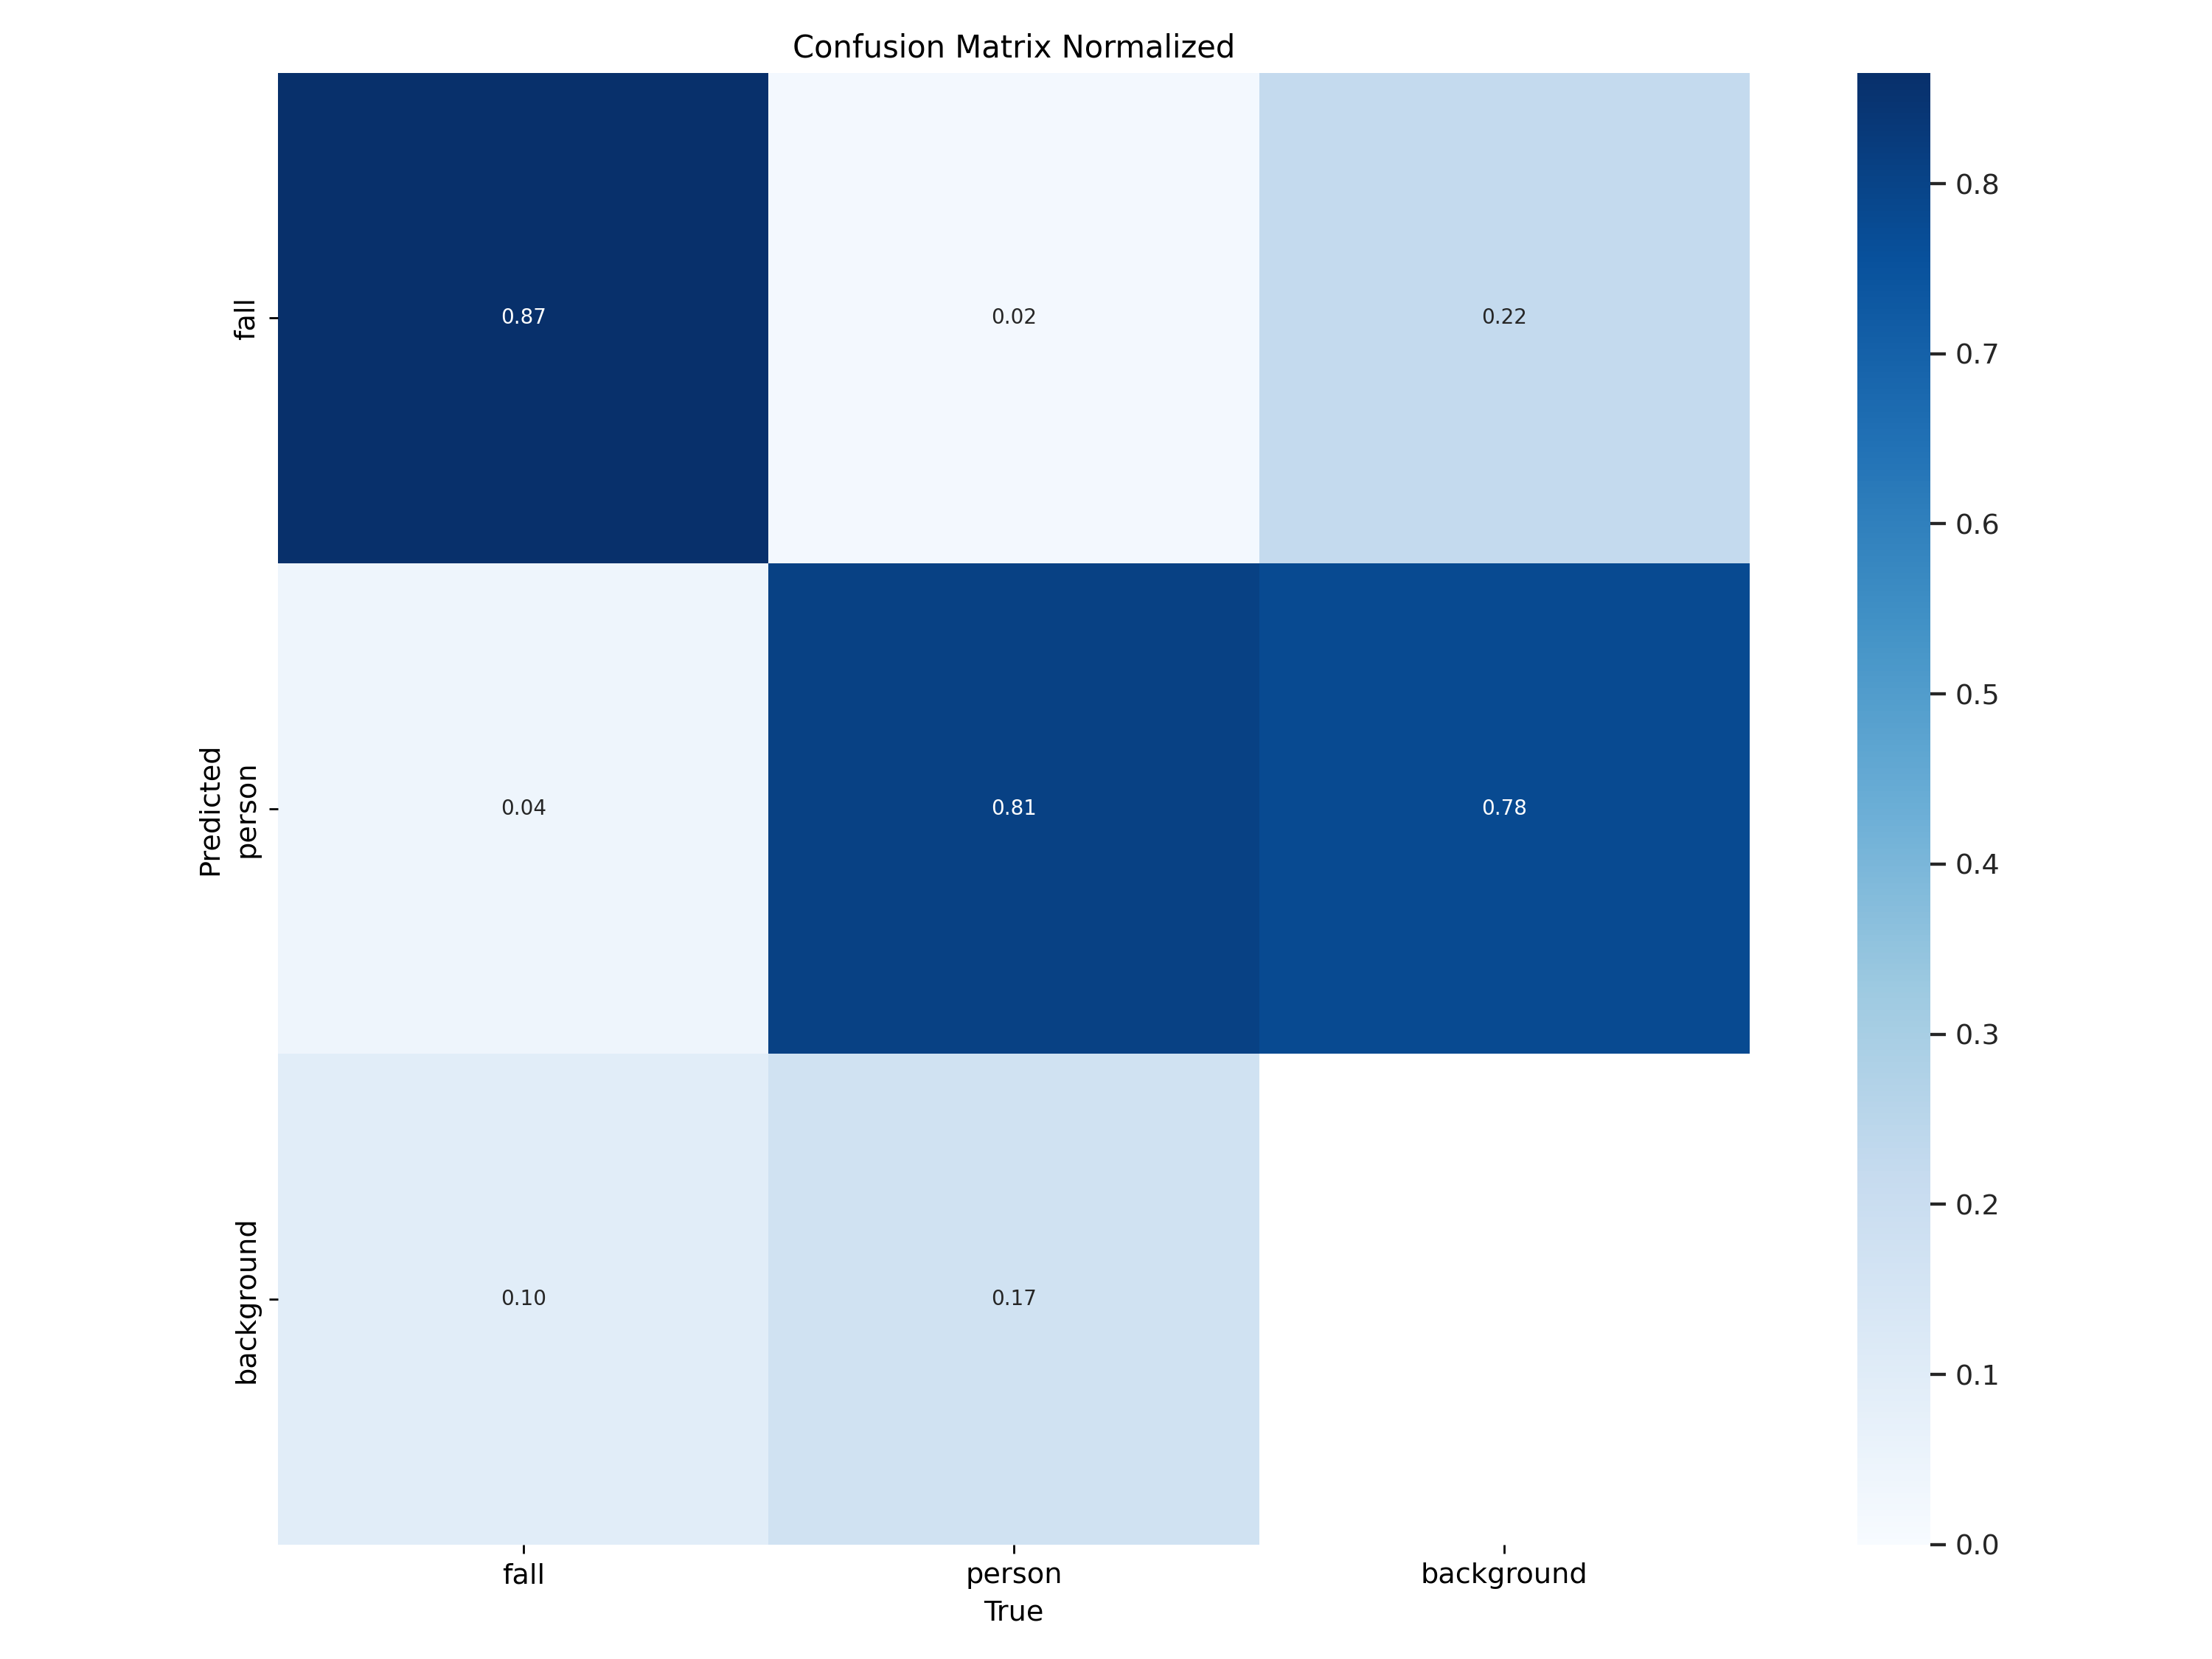

In [29]:

Image(filename=f'/content/runs/detect/val/confusion_matrix_normalized.png', width=600)

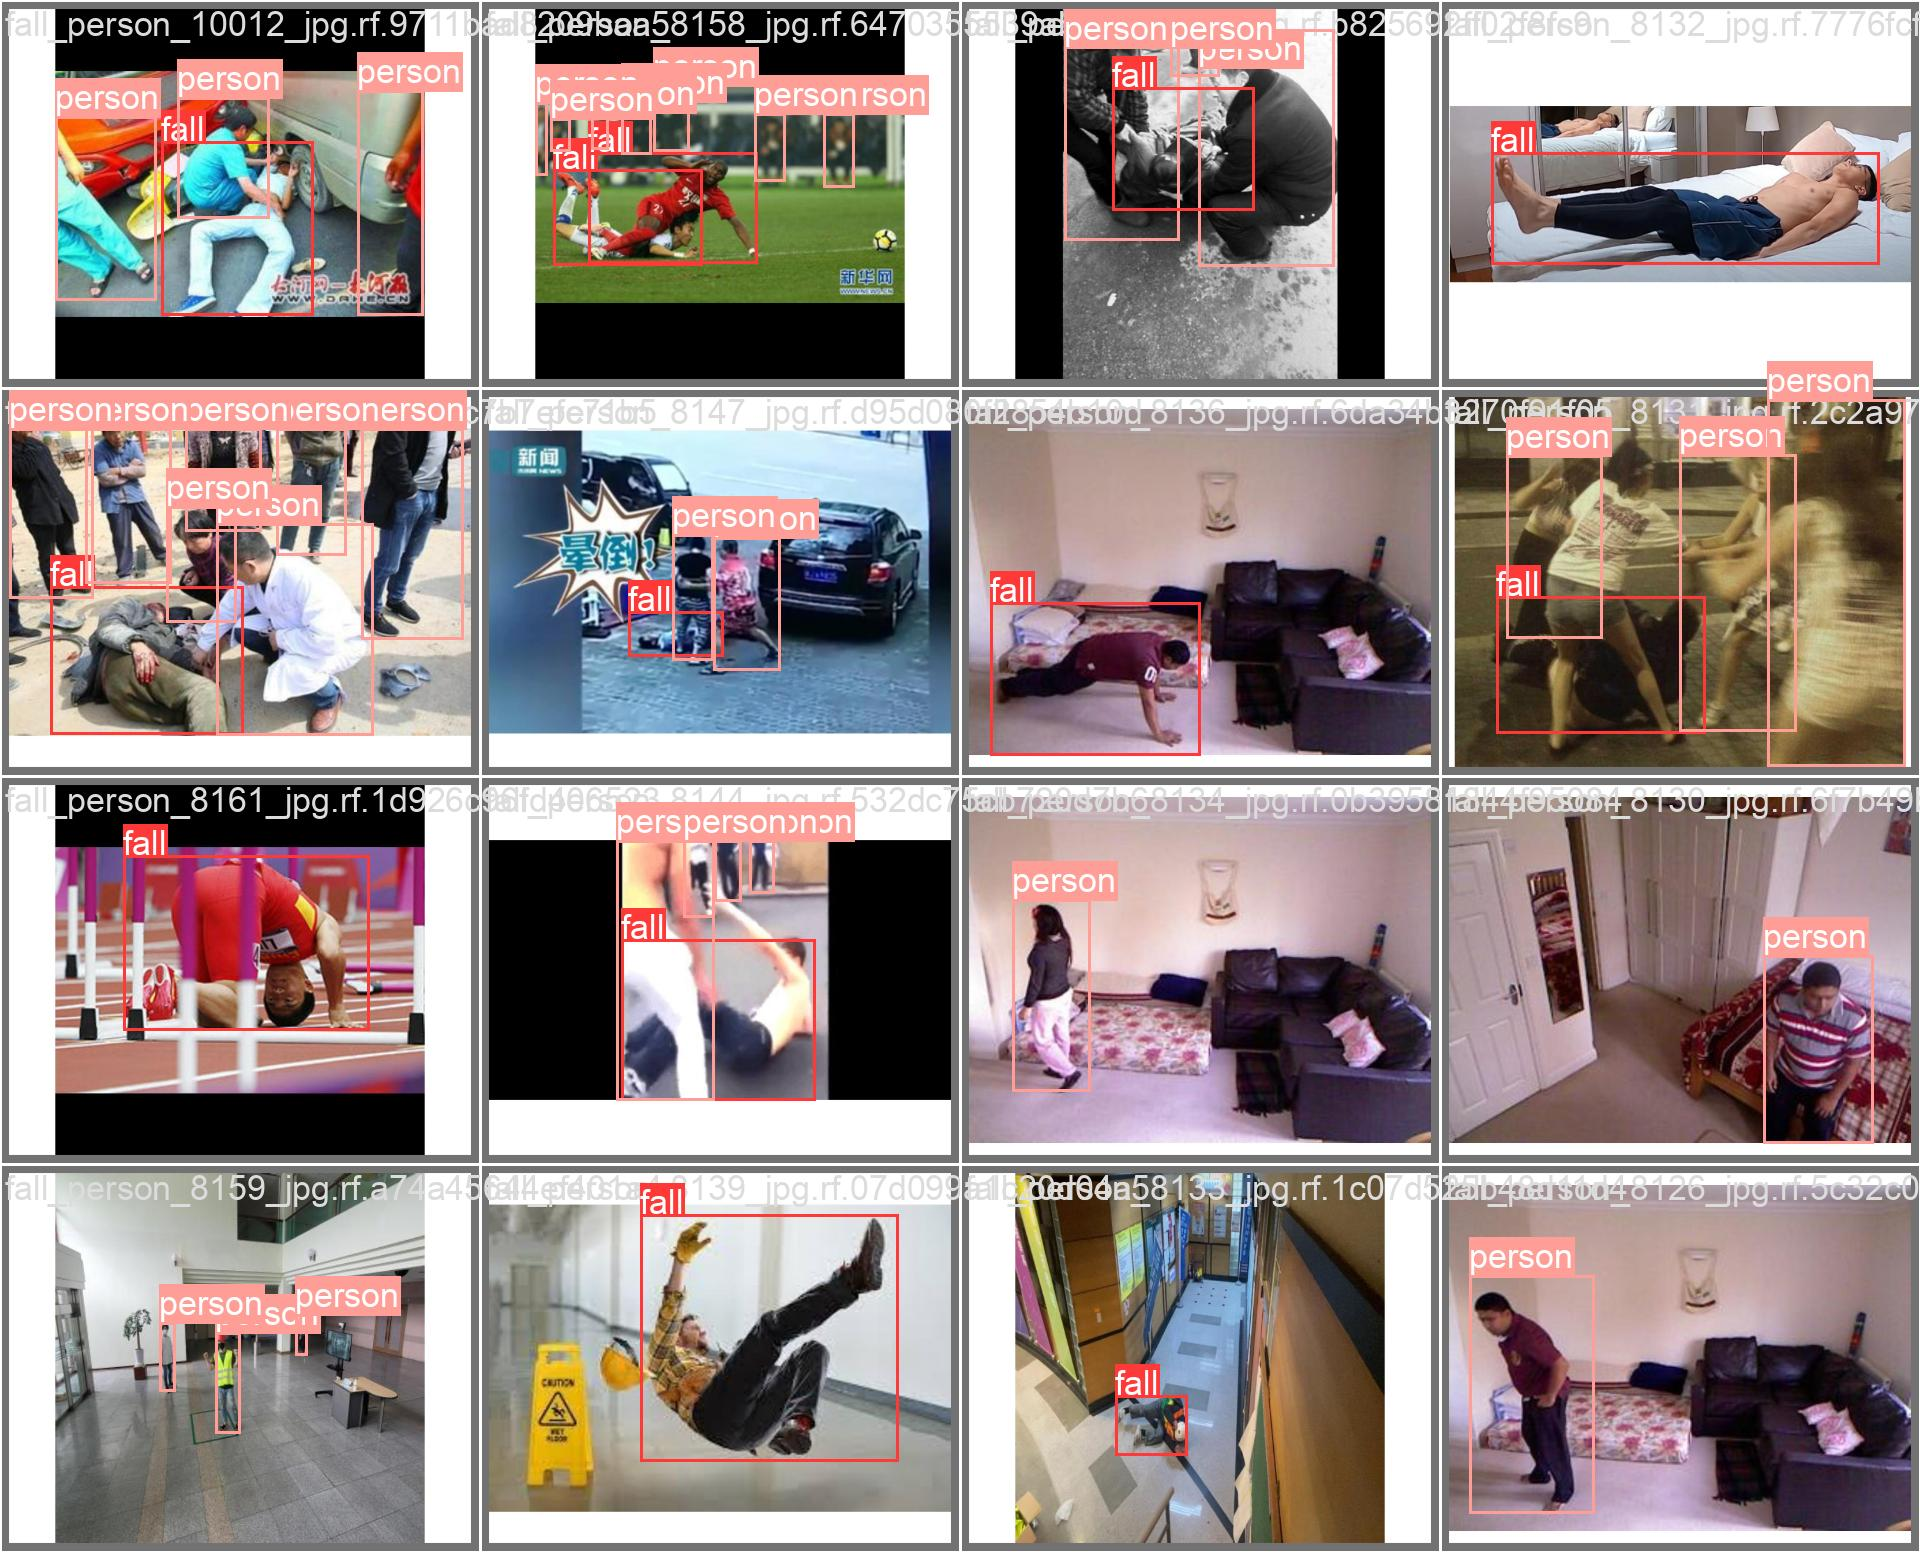

In [30]:

Image(filename=f'/content/runs/detect/val/val_batch0_labels.jpg', width=600)

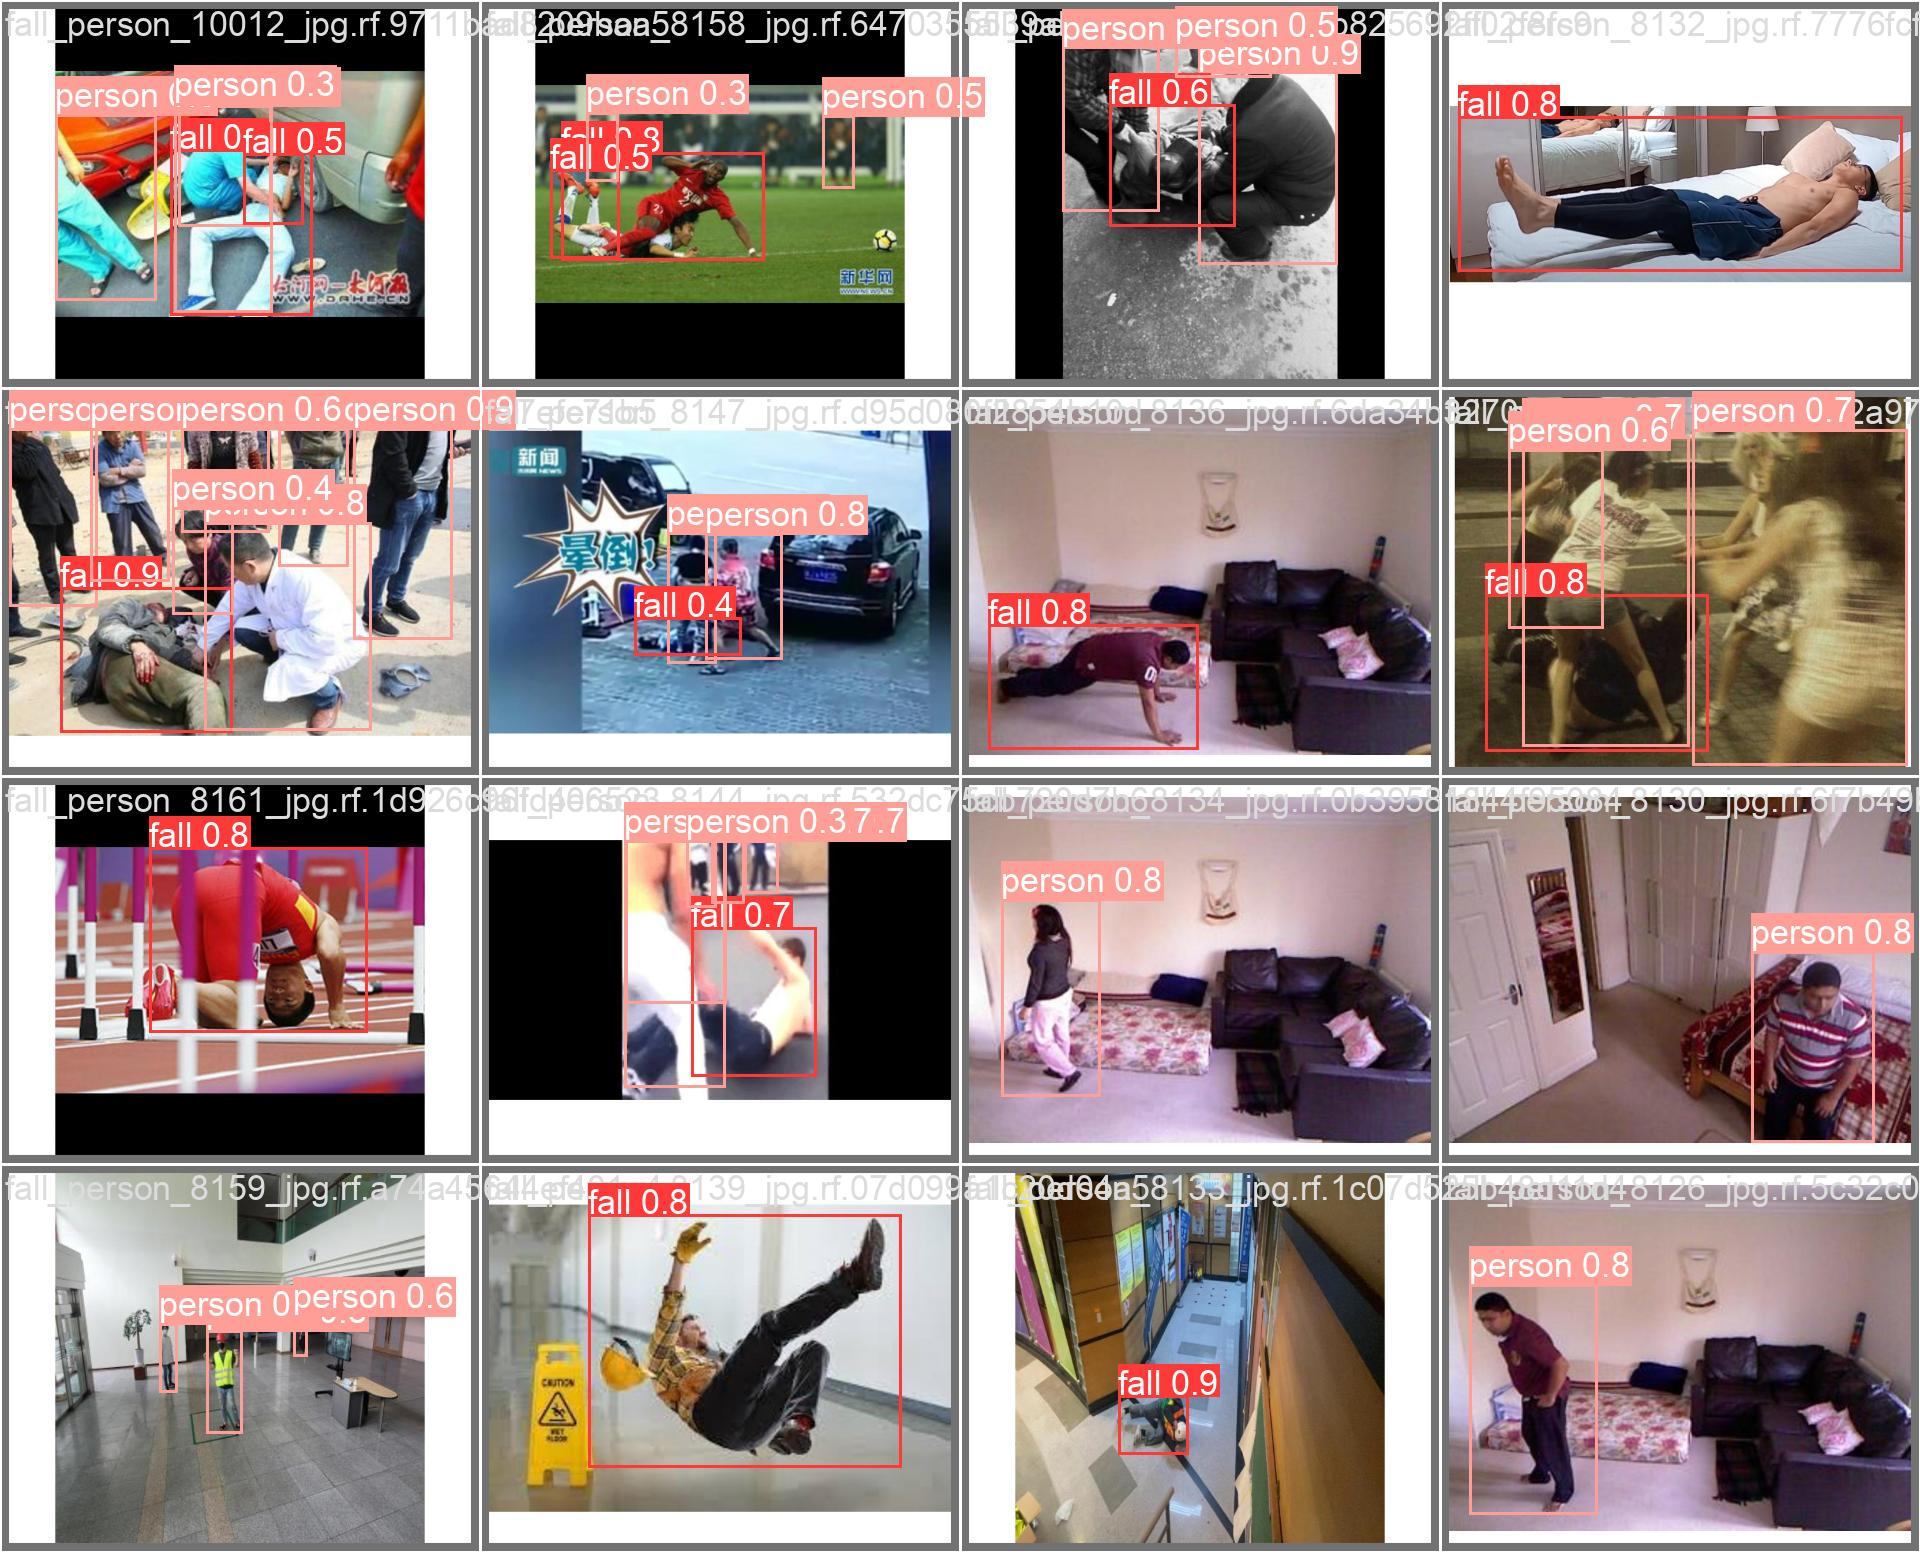

In [31]:

Image(filename=f'/content/runs/detect/val/val_batch0_pred.jpg', width=600)

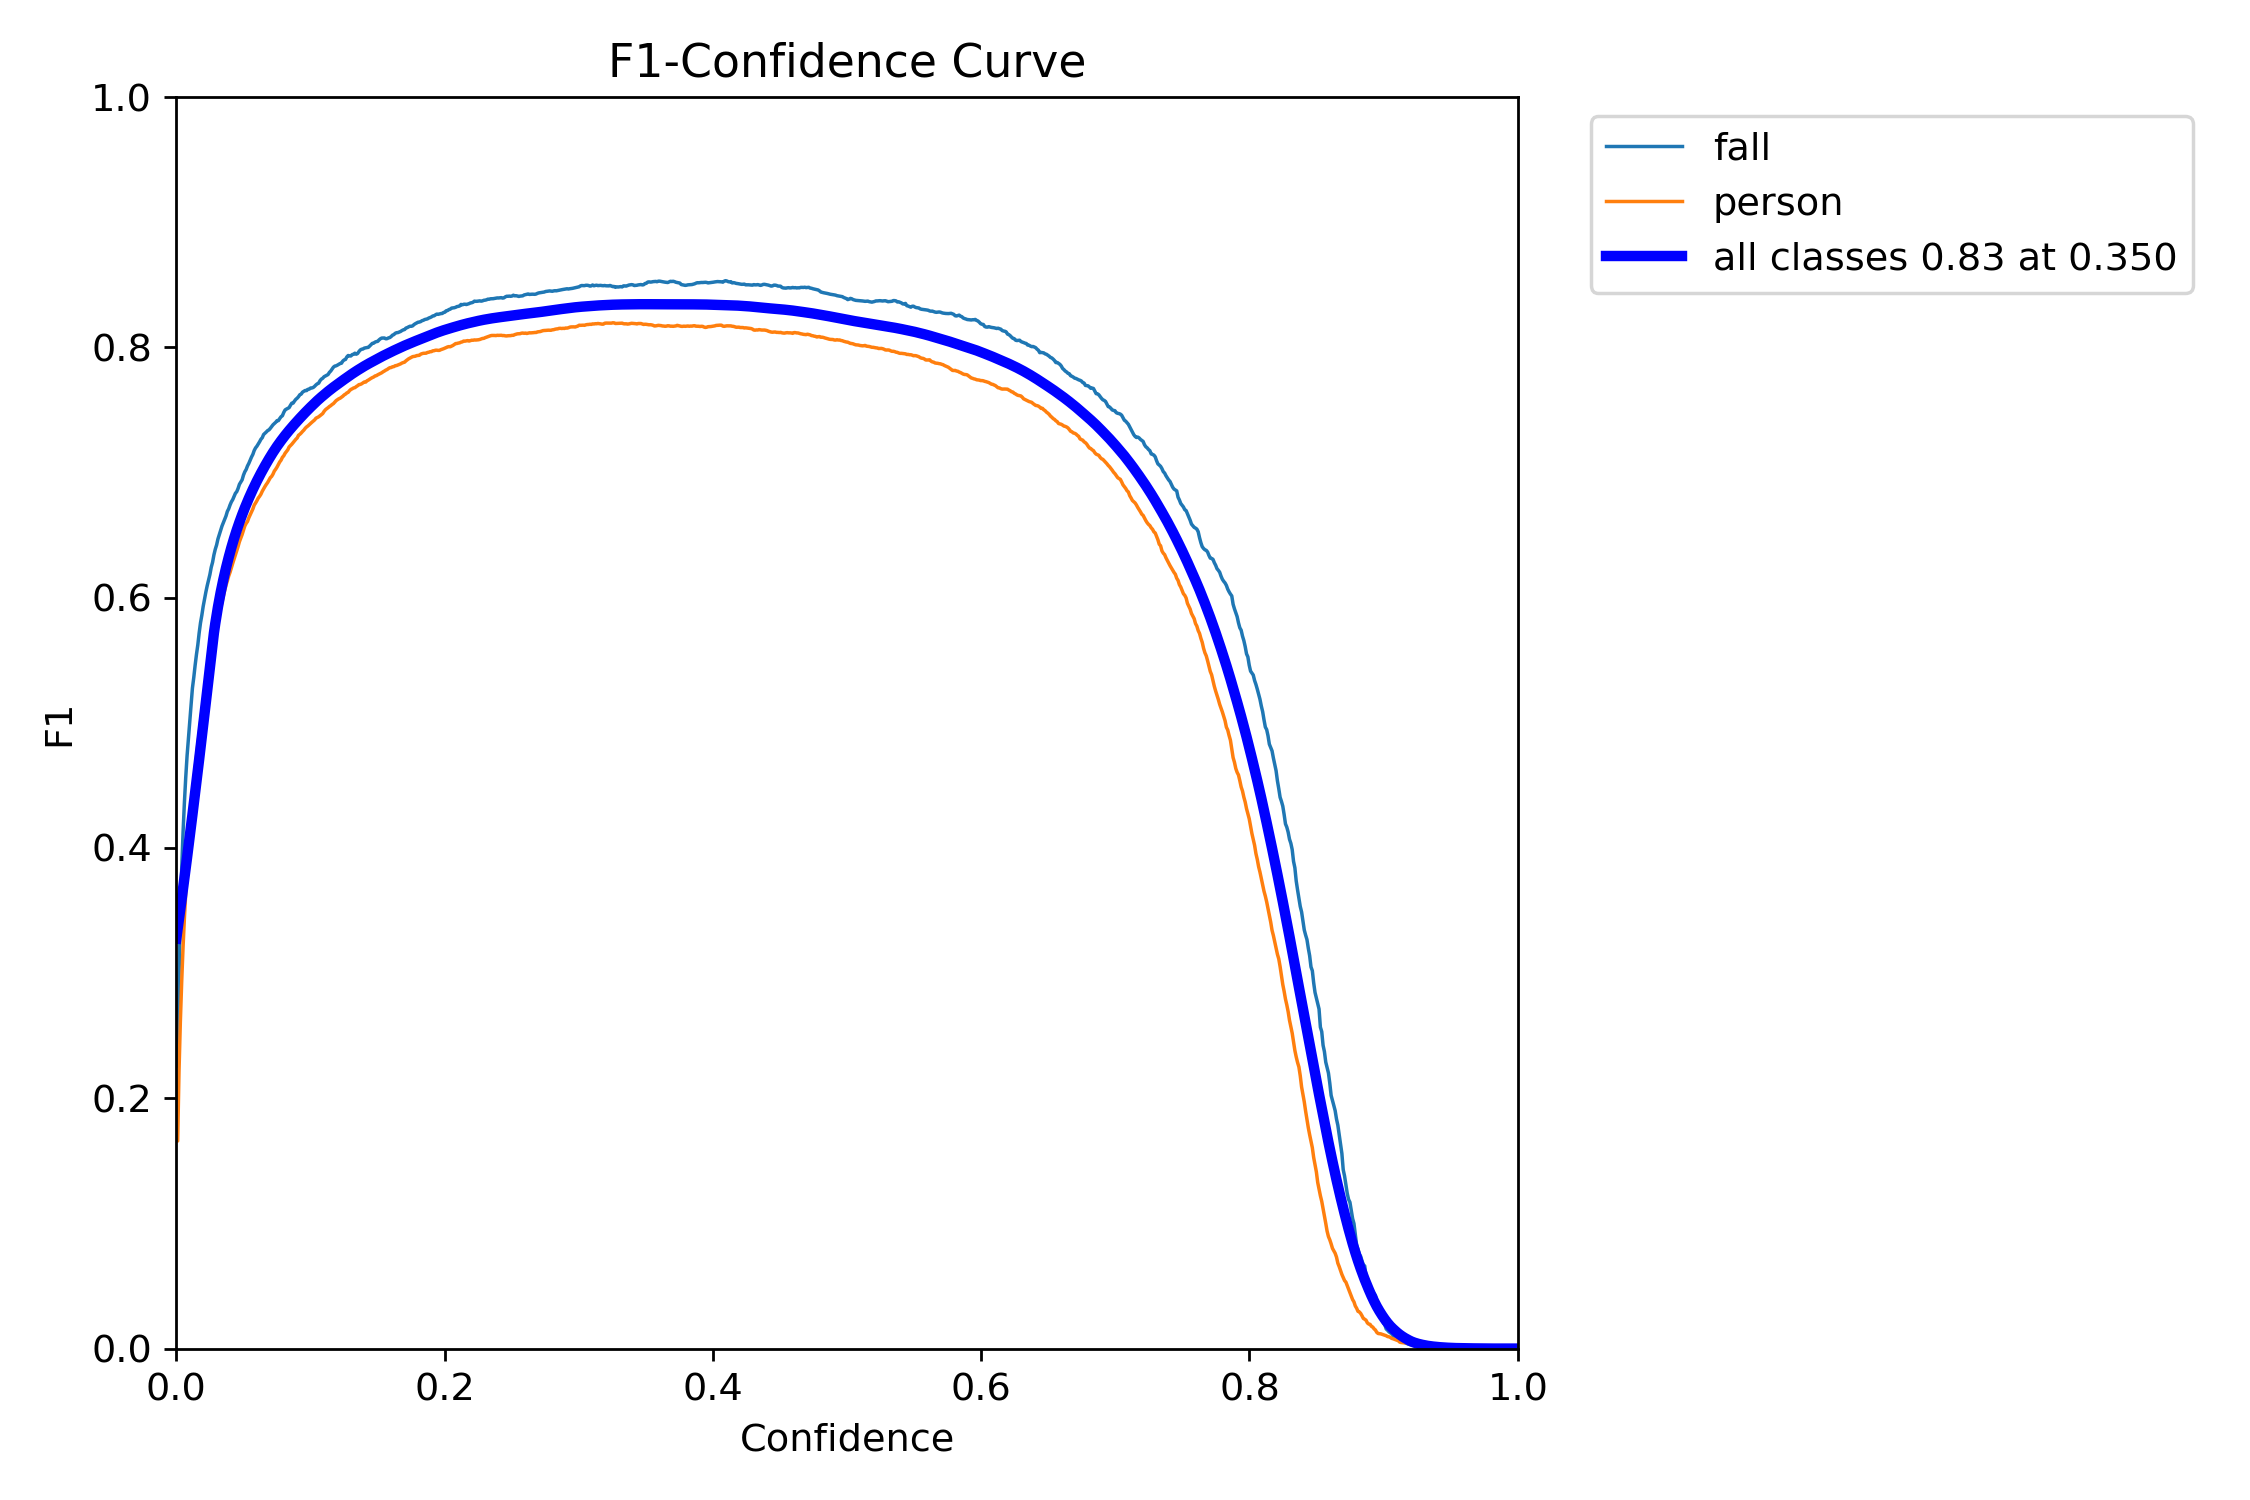

In [32]:

Image(filename=f'/content/runs/detect/val/F1_curve.png', width=600)

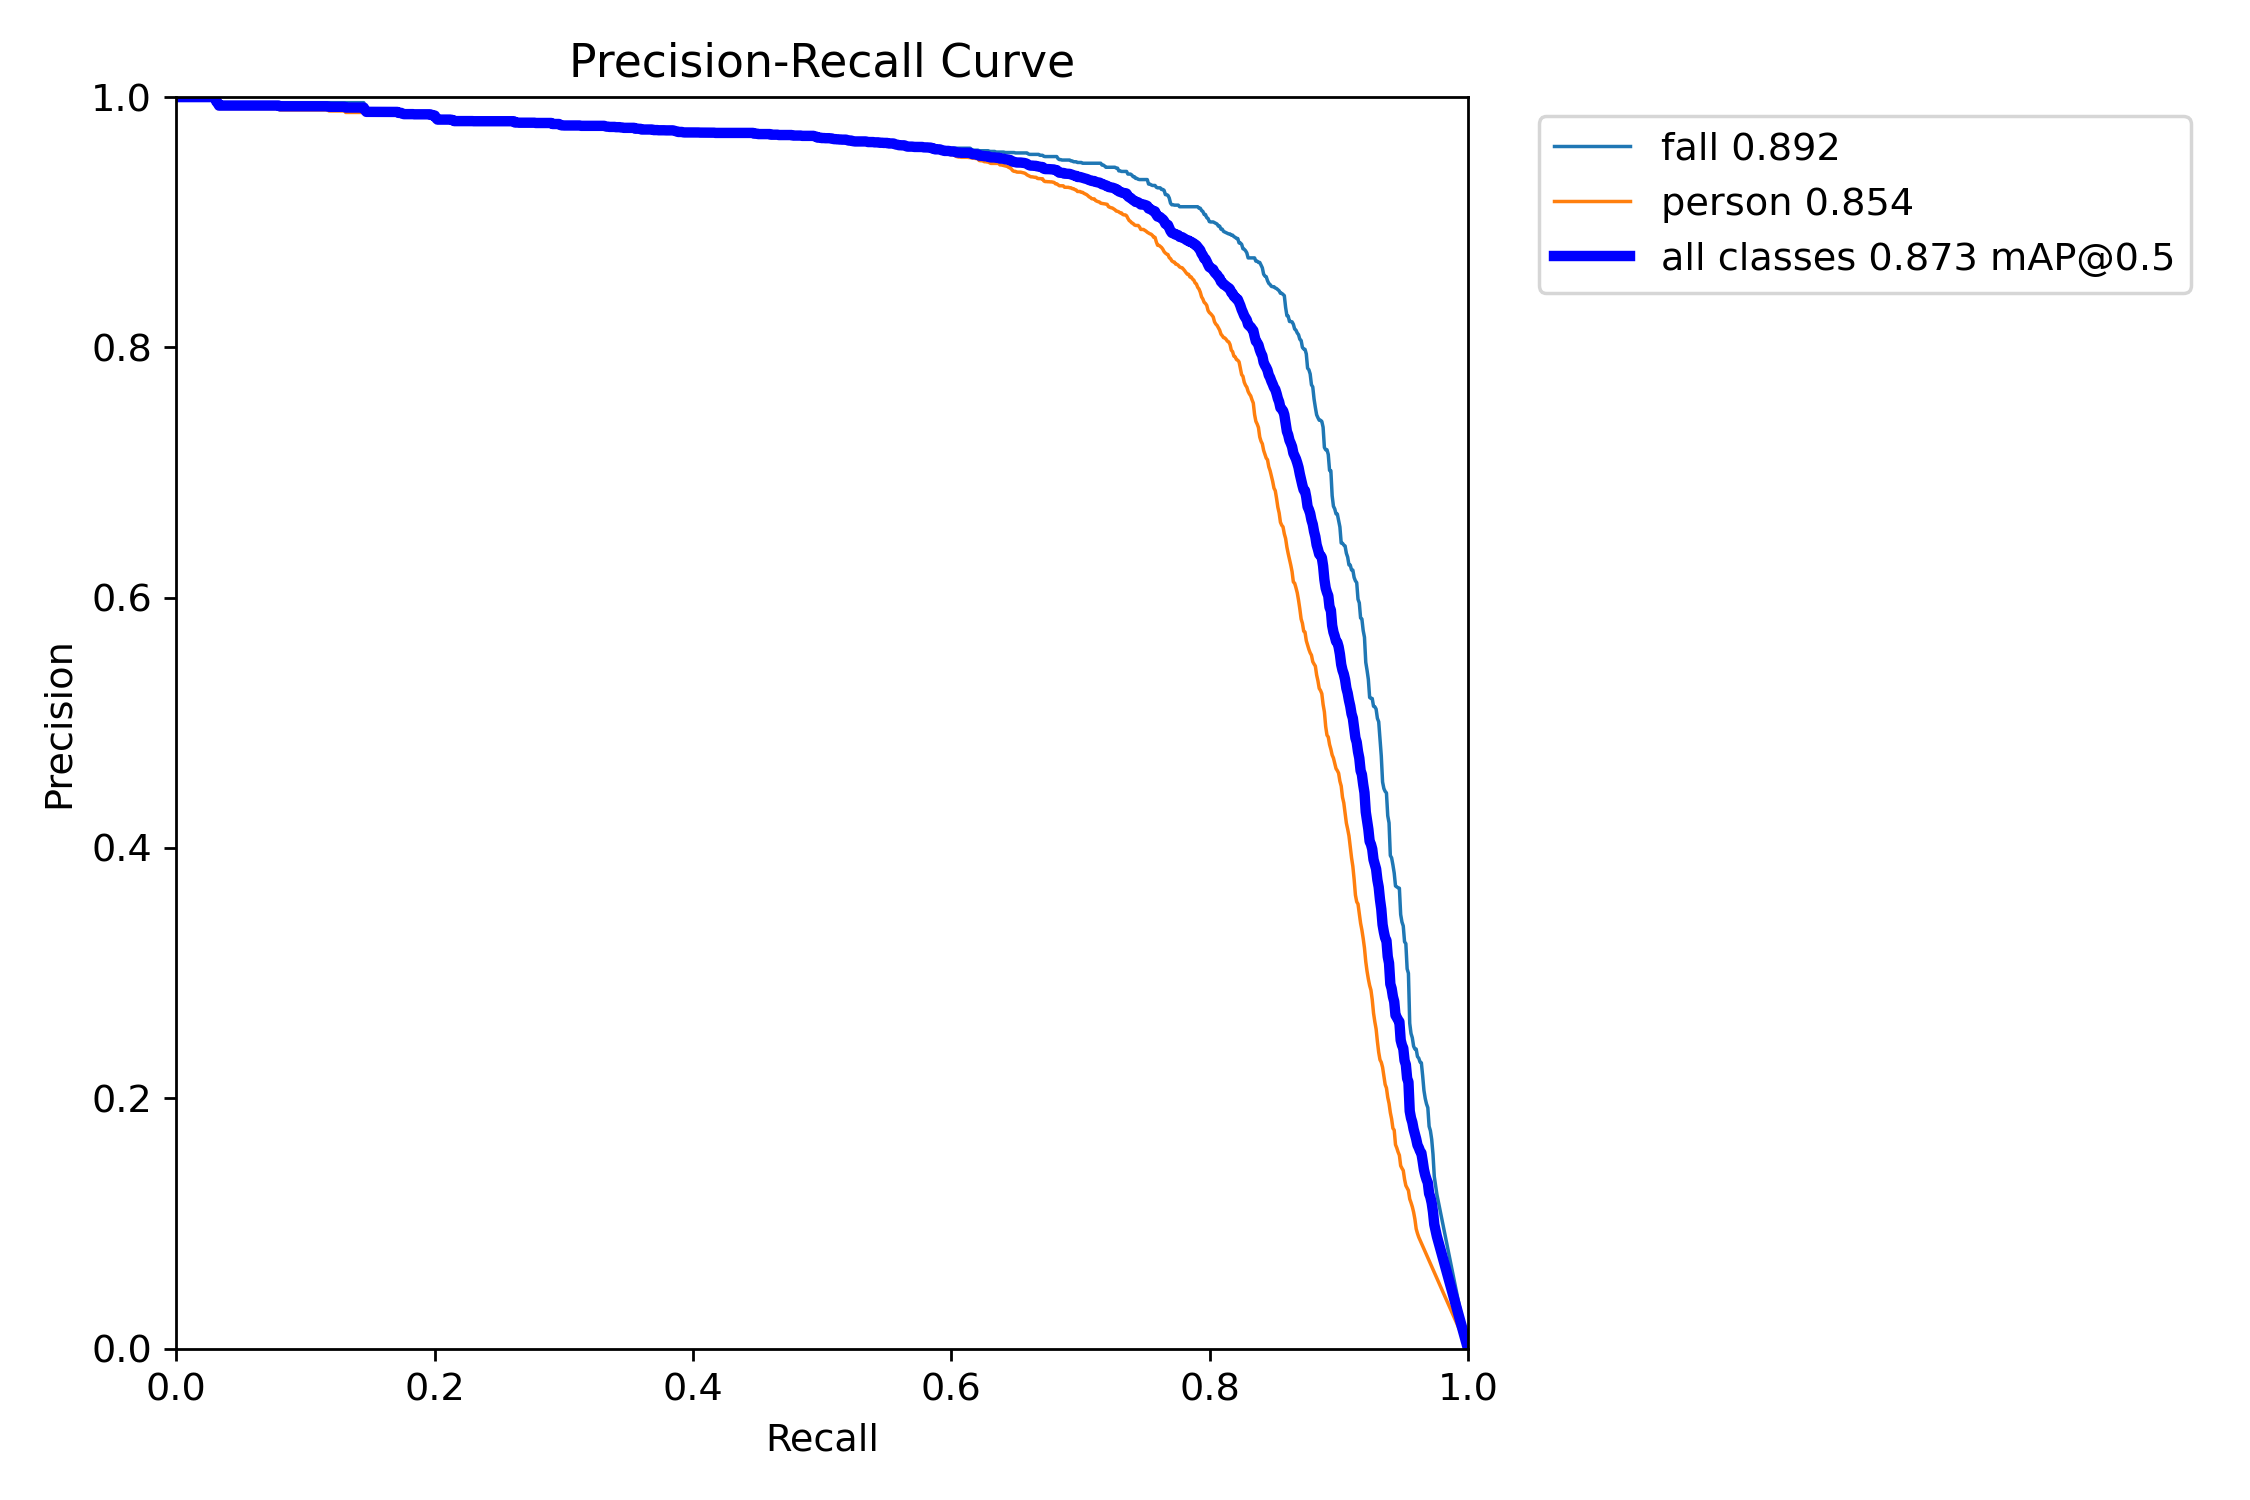

In [33]:

Image(filename=f'/content/runs/detect/val/PR_curve.png', width=600)

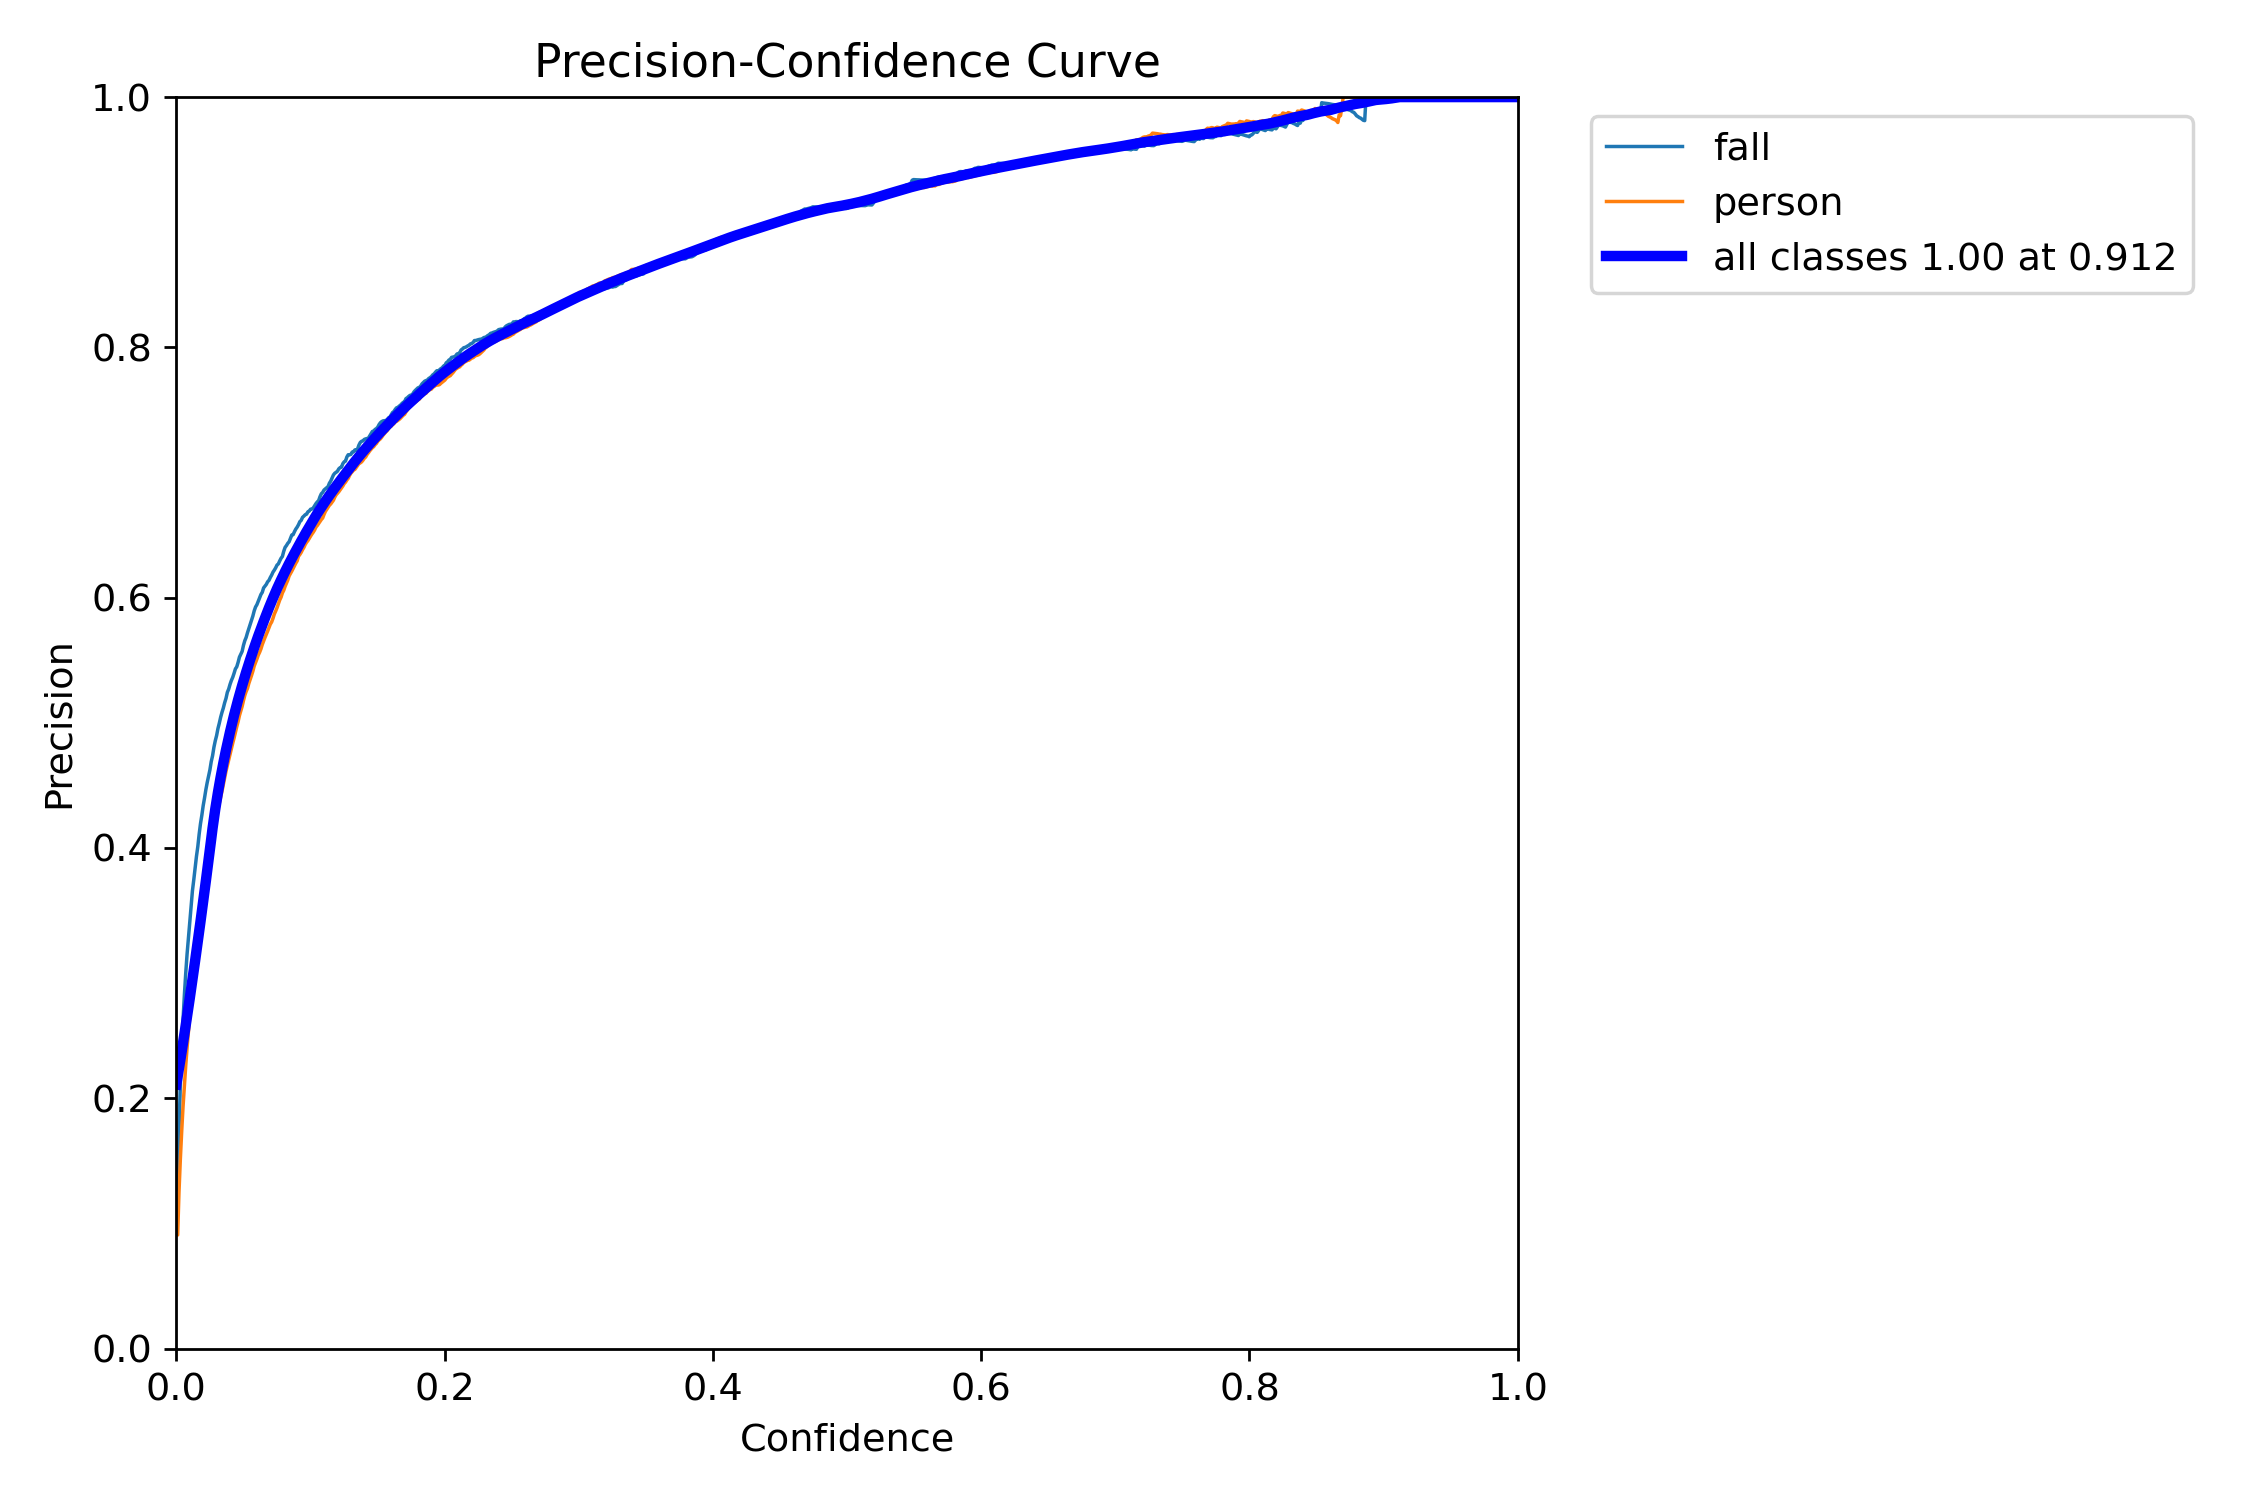

In [34]:

Image(filename=f'/content/runs/detect/val/P_curve.png', width=600)

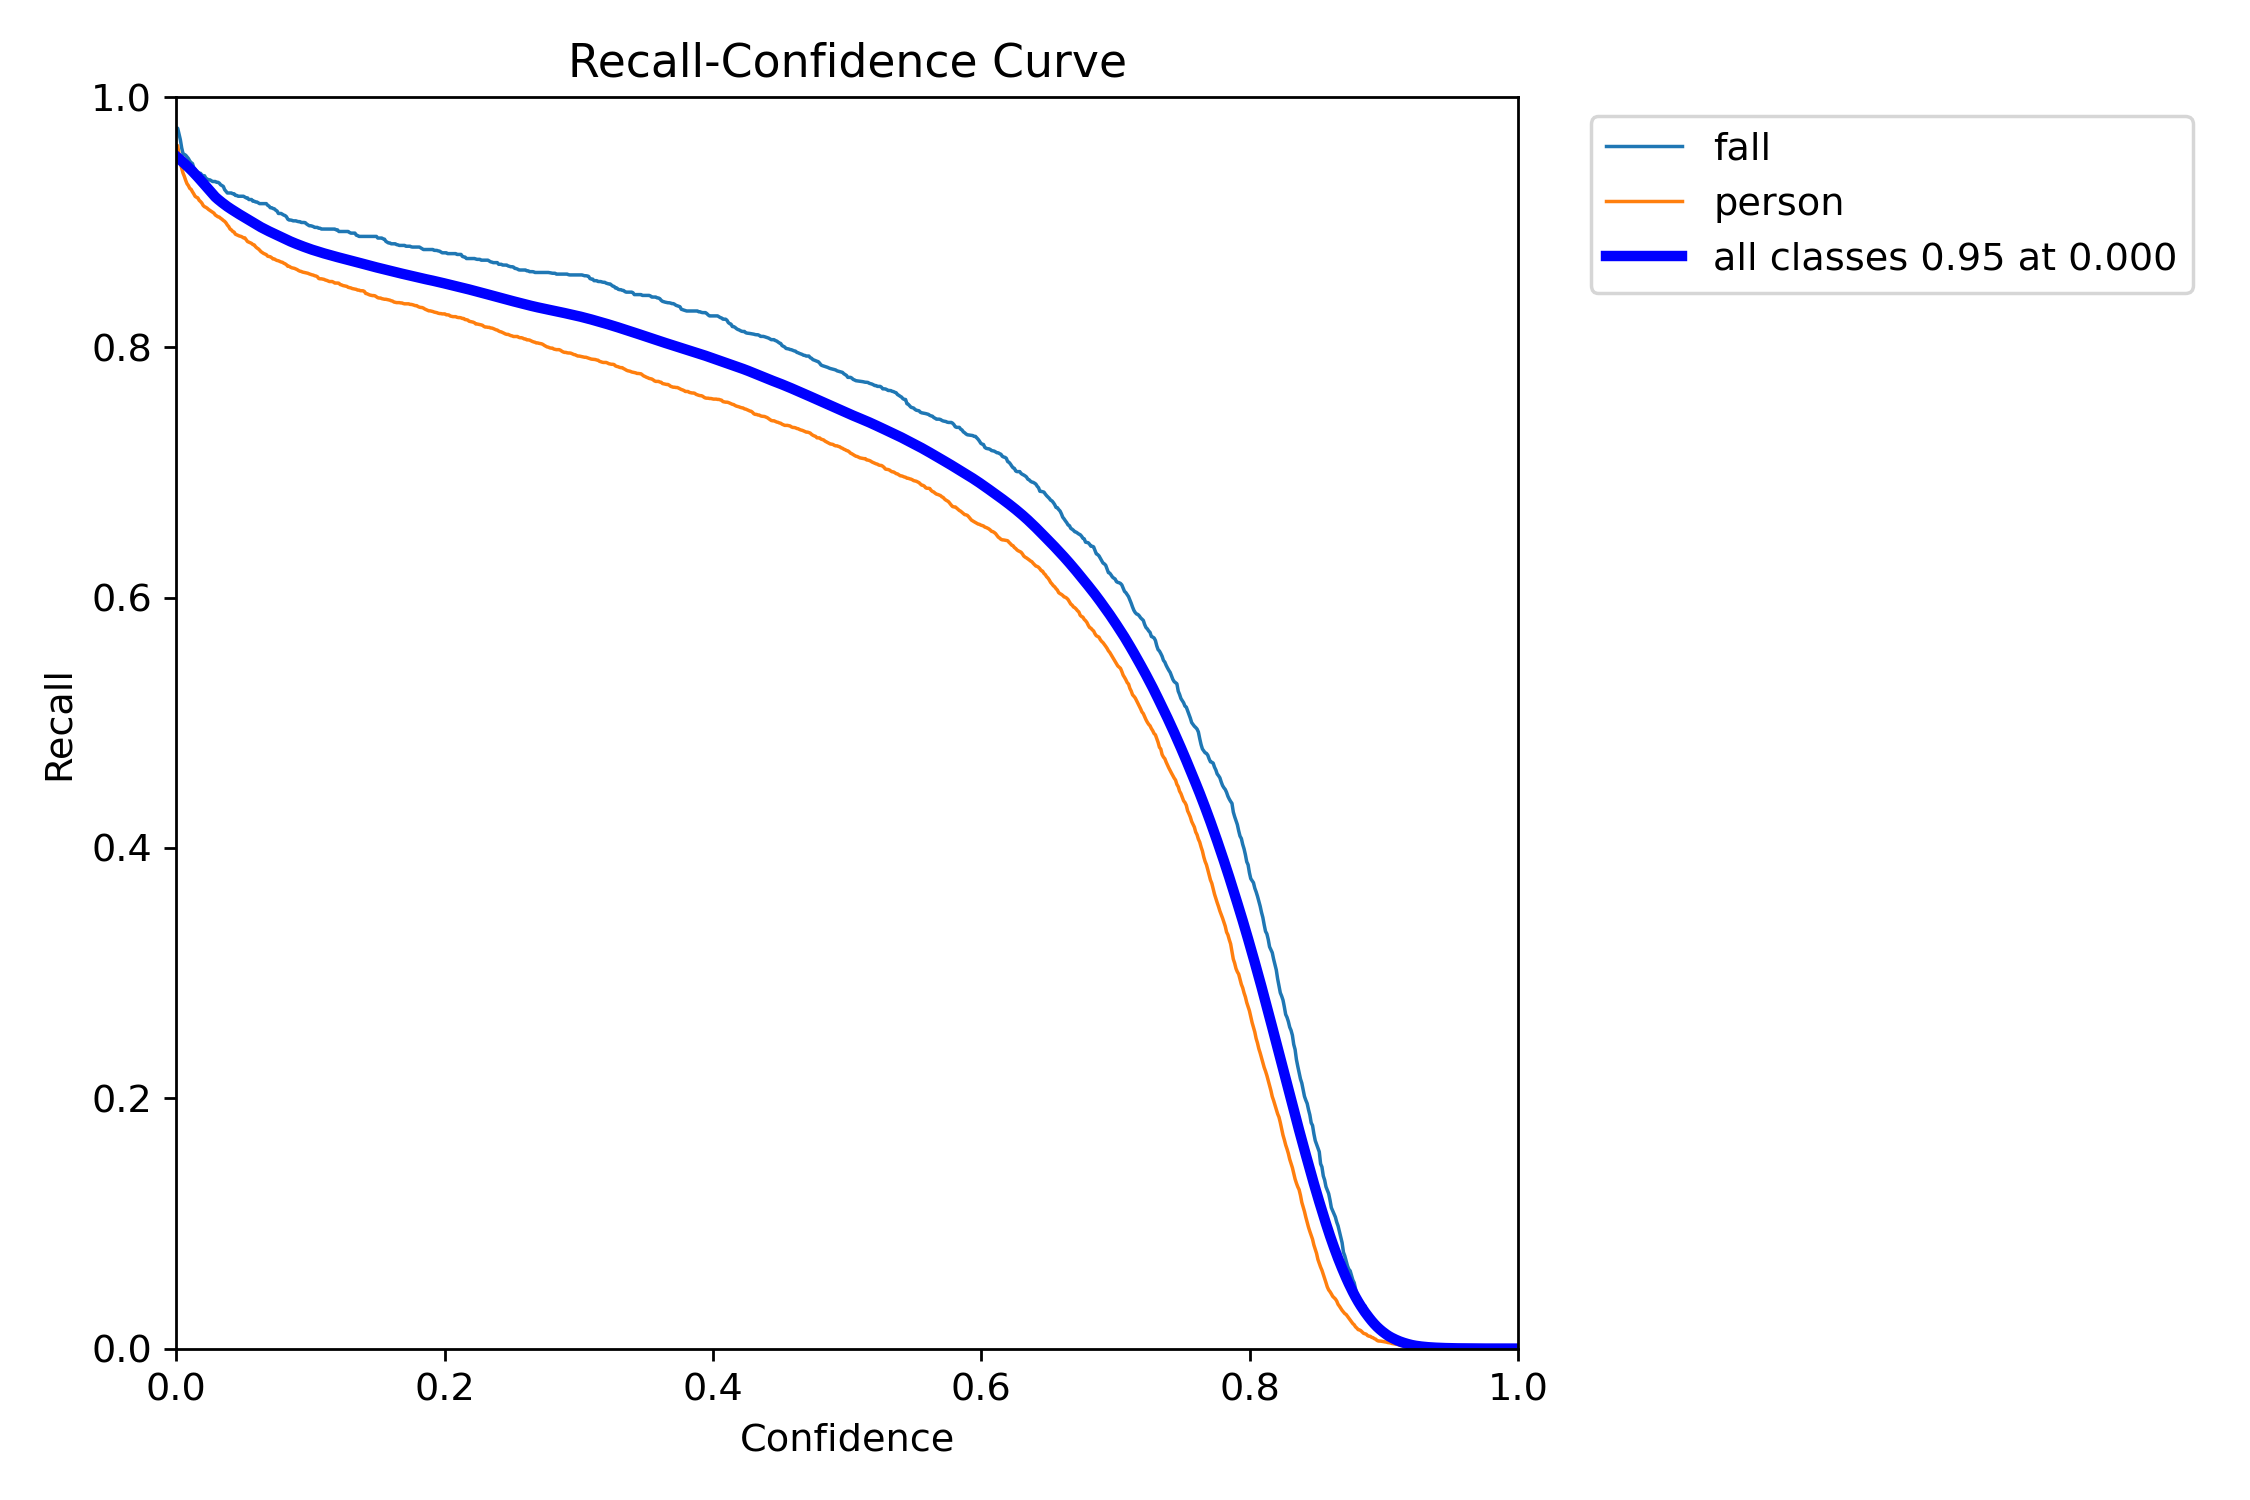

In [35]:

Image(filename=f'/content/runs/detect/val/R_curve.png', width=600)